In [6]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

# Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [7]:
# Install the Kaggle library
!pip install kaggle

# Download the dataset
!kaggle datasets download -d shilpasayura/veremi-extension-simple

# Unzip the dataset
!unzip veremi-extension-simple.zip


Dataset URL: https://www.kaggle.com/datasets/shilpasayura/veremi-extension-simple
License(s): CC0-1.0
 99% 217M/220M [00:00<00:00, 465MB/s]
100% 220M/220M [00:00<00:00, 495MB/s]
Archive:  veremi-extension-simple.zip
  inflating: veremi_extension_simple.csv  


In [8]:
import pandas as pd

# Load the dataset
#df = pd.read_csv('/root/dataset/veremi_extension_simple.csv')

df = pd.read_csv('/content/veremi_extension_simple.csv')

# Display the first few rows of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194808 entries, 0 to 3194807
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   spdx          float64
 10  spdy          float64
 11  spdz          float64
 12  aclx          float64
 13  acly          float64
 14  aclz          float64
 15  hedx          float64
 16  hedy          float64
 17  hedz          float64
 18  Attack        object 
 19  Attack_type   object 
dtypes: float64(13), int64(5), object(2)
memory usage: 487.5+ MB


In [9]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal behavior,1900539
DoS random sybil,175391
Unknown,168983
DoS disruptive,131305
Traffic congestion sybil,129270
Data replay sybil,126724
Constant speed offset,44359
DoS,44337
DoS disruptive sybil,44310


In [10]:


# Create a table with counts for each combination of 'class', 'Attack', and 'Attack_type'
class_attack_summary = df.groupby(['class', 'Attack', 'Attack_type']).size().reset_index(name='count')

# Display the result
print(class_attack_summary)


    class  Attack               Attack_type    count
0       0  Normal           Normal behavior  1900539
1       1   Fault         Constant position    43653
2       2   Fault  Constant position offset    43567
3       3   Fault           Random position    43857
4       4   Fault    Random position offset    42575
5       5   Fault            Constant speed    41925
6       6   Fault     Constant speed offset    44359
7       7   Fault              Random speed    42258
8       8   Fault       Random speed offset    42583
9       9  Attack                Disruptive    42790
10     10  Attack               Data replay    43264
11     11  Attack                       DoS    44337
12     12  Attack                DoS random    43118
13     13  Attack            DoS disruptive   131305
14     14  Attack         Data replay sybil   126724
15     15  Attack  Traffic congestion sybil   129270
16     16  Attack          DoS random sybil   175391
17     17  Attack      DoS disruptive sybil   

## False Data Injection (FDI)
| Class | Attack_type               |
|-------|---------------------------|
| 0     | Normal                     |
| 1     | Constant position          |
| 2     | Constant position offset   |
| 3     | Random position            |
| 4     | Random position offset     |
| 5     | Constant speed             |
| 6     | Constant speed offset      |
| 7     | Random speed               |
| 8     | Random speed offset        |


### Drop faluts

In [13]:
import pandas as pd

# Load your dataset (replace with your actual file path if needed)
# df = pd.read_csv('veremi_dataset.csv')

# Step 1: Define classes to keep
normal_class = [0]
attack_classes = list(range(9, 20))  # Classes 9 to 19 are labeled attacks or unknown

# Step 2: Filter the dataset
df_binary = df[df['class'].isin(normal_class + attack_classes)].copy()

# Step 3: Create a new binary label column
# 0 = Normal, 1 = Attack
df_binary['binary_label'] = df_binary['class'].apply(lambda x: 0 if x == 0 else 1)

# Step 4: Check class distribution
print("Binary Class Distribution:")
print(df_binary['binary_label'].value_counts())

print("\nTotal Records after Filtering:")
print(len(df_binary))
# Result: df_binary is now ready for binary classification modeling


Binary Class Distribution:
binary_label
0    1900539
1     949492
Name: count, dtype: int64

Total Records after Filtering:
2850031


In [17]:
# Drop any rows with null values
df_binary = df_binary.dropna()

# Optional: Confirm how many rows remain
print("Remaining records after dropping nulls:", len(df_binary))


Remaining records after dropping nulls: 2850031


In [18]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850031 entries, 0 to 3194807
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   spdx          float64
 10  spdy          float64
 11  spdz          float64
 12  aclx          float64
 13  acly          float64
 14  aclz          float64
 15  hedx          float64
 16  hedy          float64
 17  hedz          float64
 18  Attack        object 
 19  Attack_type   object 
 20  binary_label  int64  
dtypes: float64(13), int64(6), object(2)
memory usage: 478.4+ MB


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Your Dataset
# If already loaded in Colab, skip this
# Example:
# df_binary = pd.read_csv('/content/veremi_filtered_binary.csv')

# Step 3: Drop nulls (if not already done)
df_binary = df_binary.dropna()

# Step 4: Summary Statistics
eda_summary = df_binary.describe(include='all').transpose()
display(eda_summary)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
type,2850031.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
sendTime,2850031.0,NaN,NaN,NaN,50727.361907,18264.479115,240.602763,33245.653558,50483.220749,66727.082454,86399.984938
sender,2850031.0,NaN,NaN,NaN,73753.996904,42062.572657,9.0,37767.0,72903.0,110271.0,147981.0
senderPseudo,2850031.0,NaN,NaN,NaN,105022255.015034,361721785.203297,1.0,10401133.0,10802175.0,101173696.0,4206511862.0
messageID,2850031.0,NaN,NaN,NaN,226717488.193432,137384494.445525,4184.0,117978940.0,223504866.0,344637220.0,458622809.0
class,2850031.0,NaN,NaN,NaN,4.886383,7.081562,0.0,0.0,0.0,13.0,19.0
posx,2850031.0,NaN,NaN,NaN,593.737681,390.222547,-20.012992,226.507017,539.534986,911.642221,1518.955691
posy,2850031.0,NaN,NaN,NaN,664.635158,303.174957,-22.479558,419.655044,702.895605,895.468406,1522.608627
posz,2850031.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spdx,2850031.0,NaN,NaN,NaN,1.775255,9.811487,-25.327616,-3.310253,0.000268,7.41419,39.999704


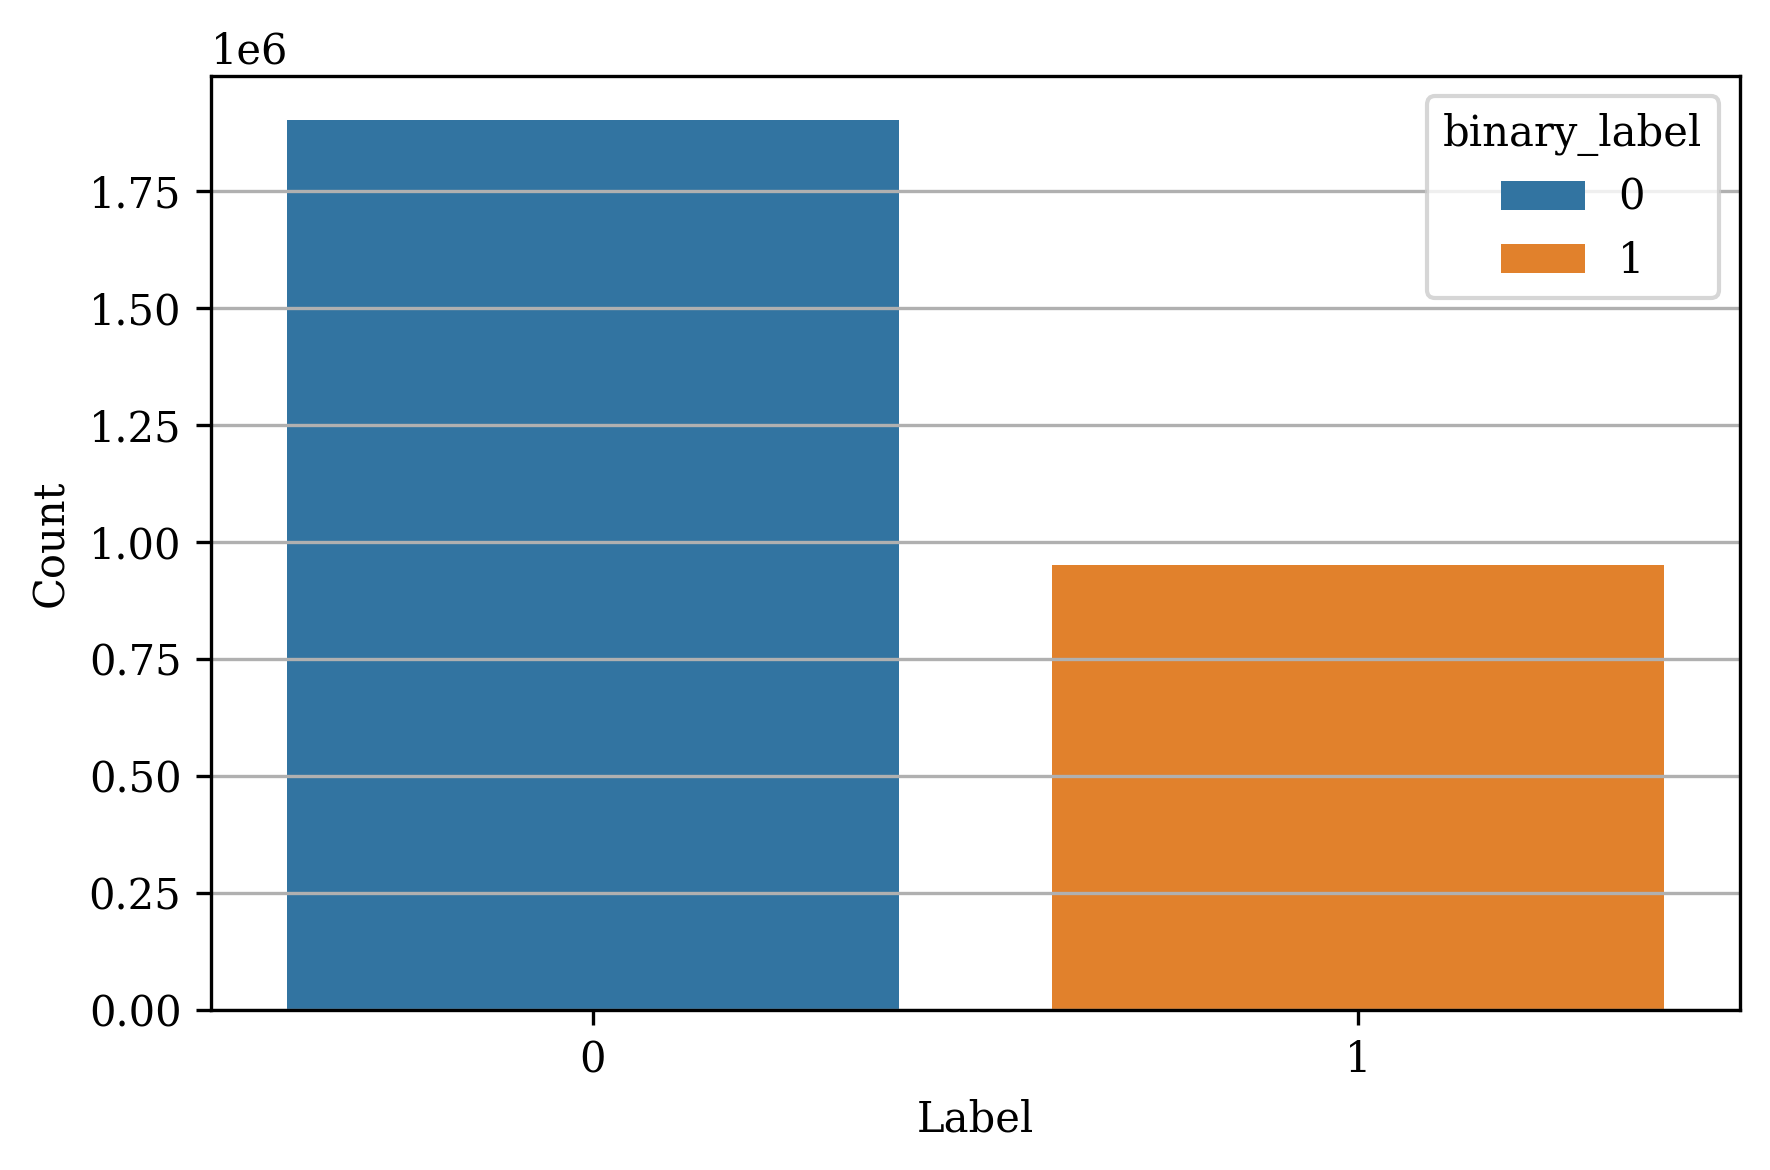

In [23]:
plt.rcParams.update({
    'font.family': 'serif',
    'figure.dpi': 300,
    'savefig.dpi': 300
})

# Binary Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_binary, x='binary_label', hue='binary_label')
#plt.title("Binary Label Distribution (0 = Normal, 1 = Attack)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("binary_label_distribution.png", dpi=300)
plt.show()

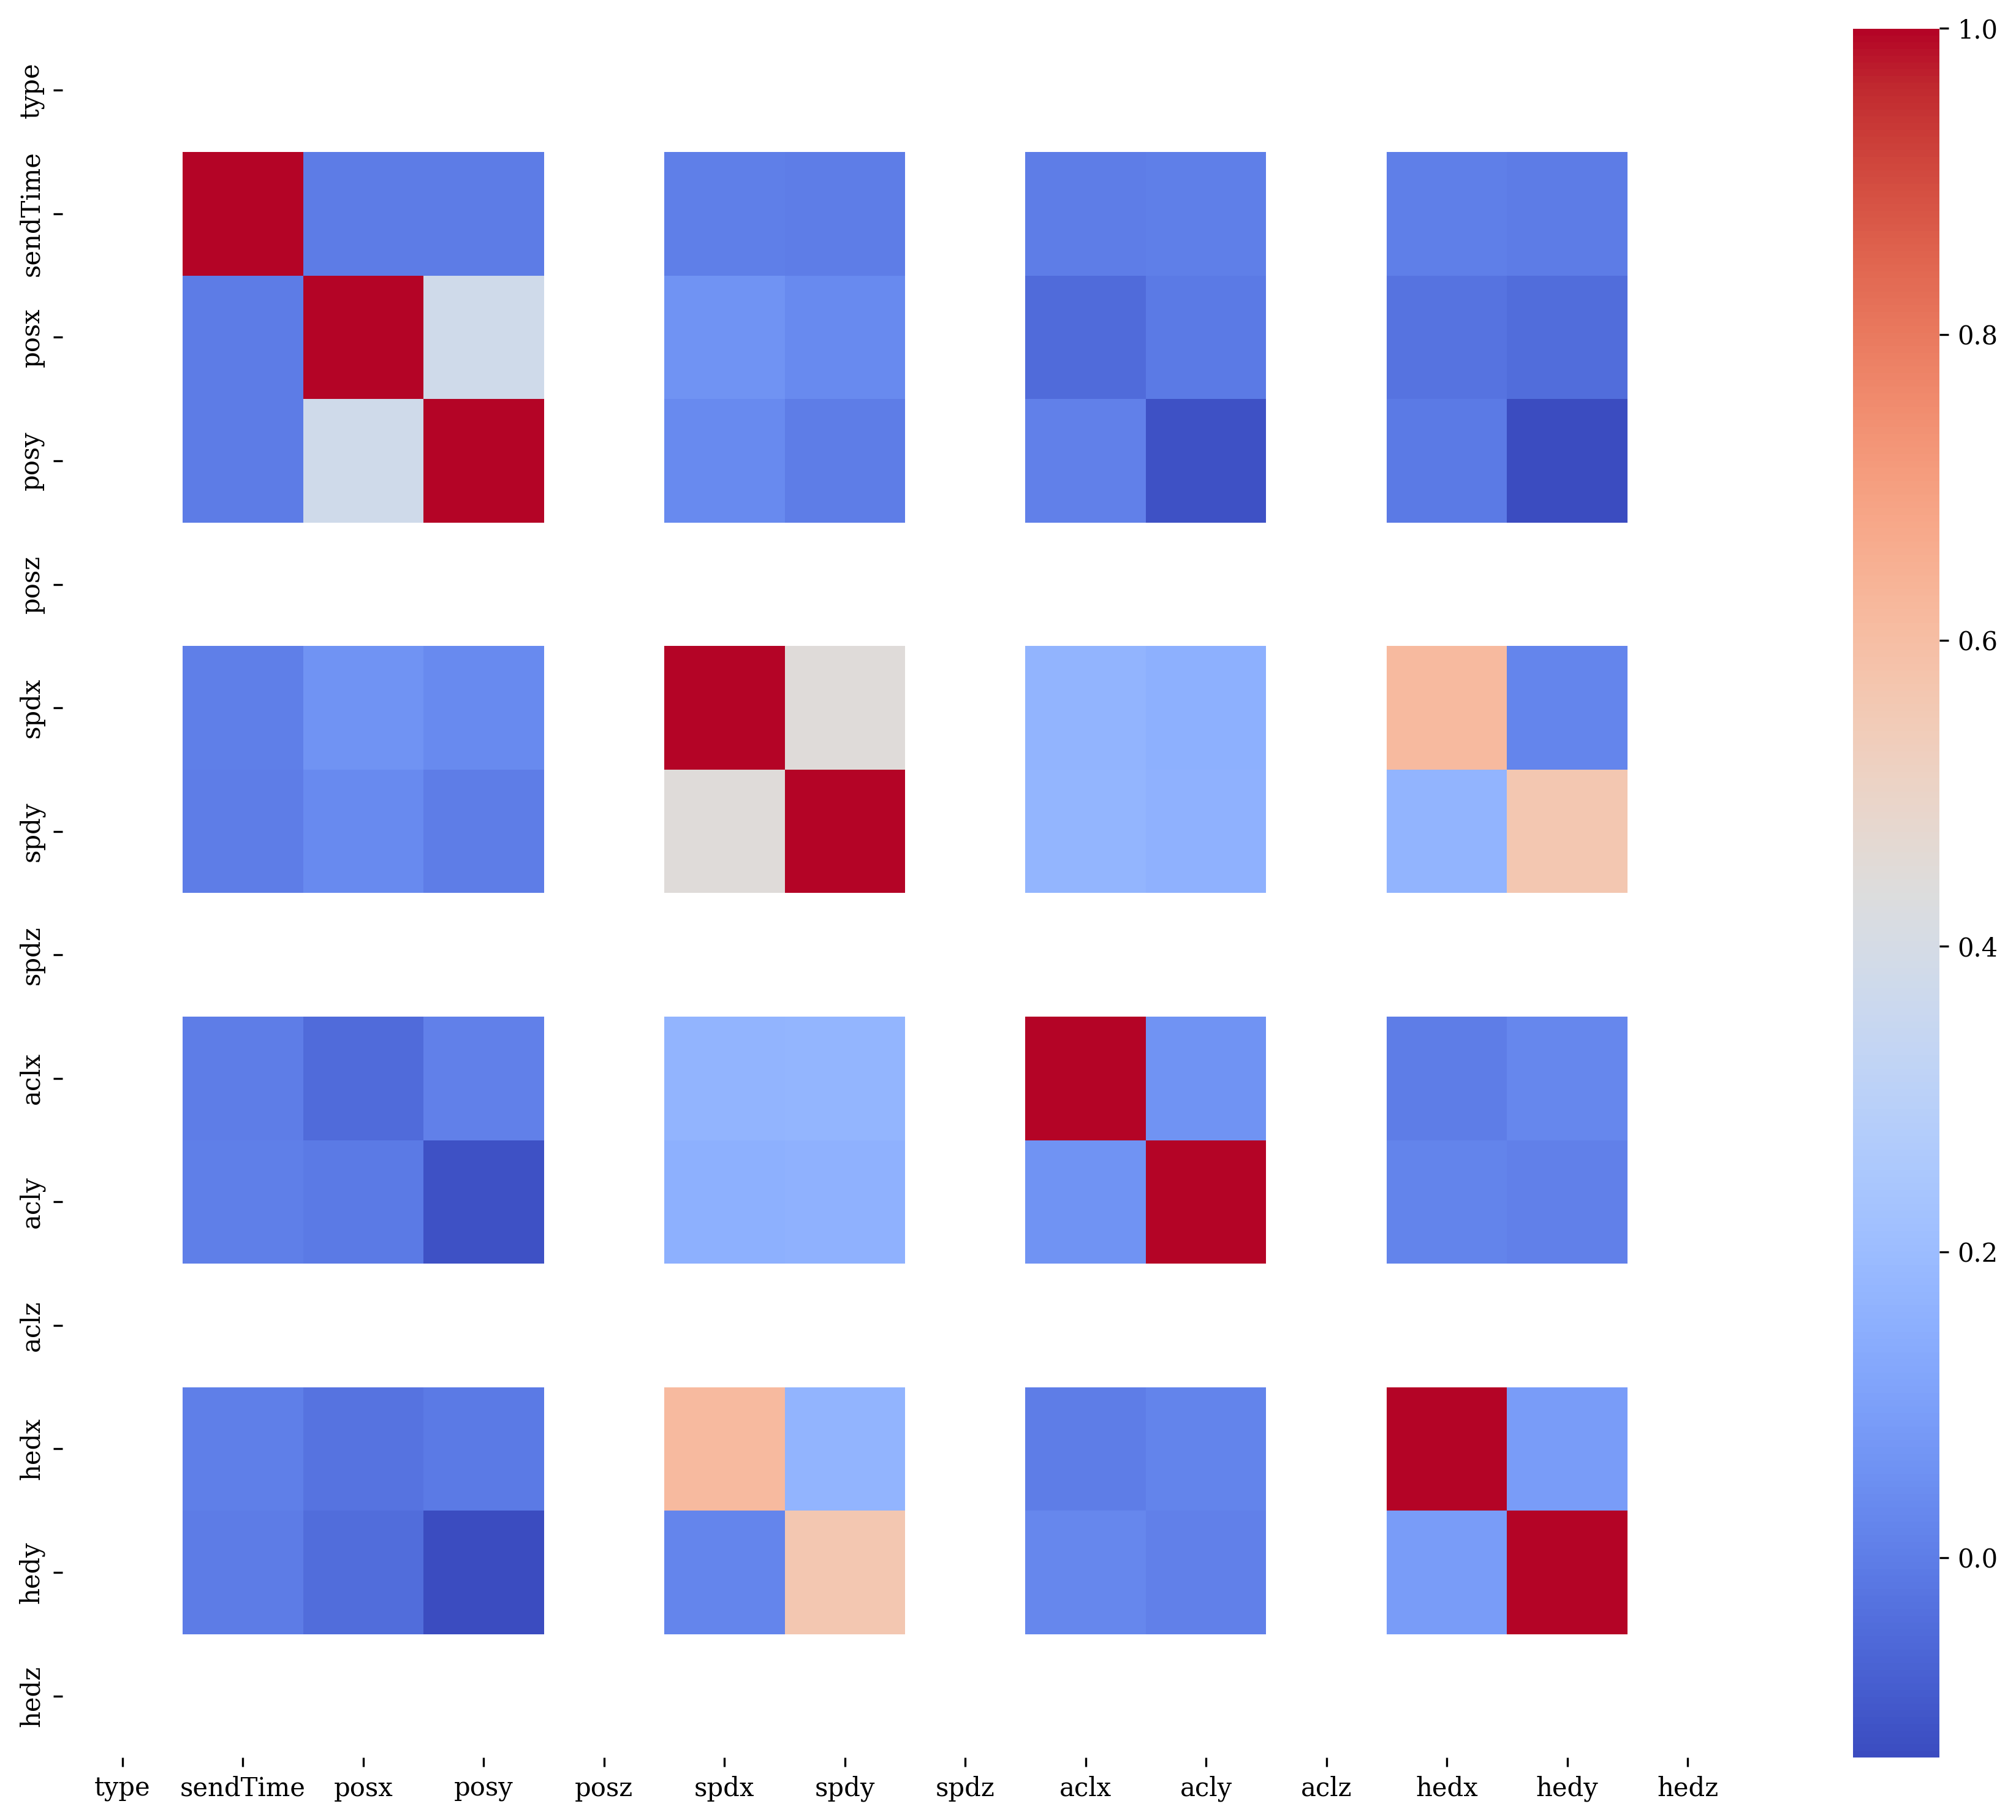

In [24]:
# Correlation Heatmap (with save)
features_to_correlate = df_binary.drop(columns=['class', 'binary_label', 'Attack', 'Attack_type', 'sender', 'senderPseudo', 'messageID'])

plt.figure(figsize=(12, 10))
sns.heatmap(features_to_correlate.corr(), cmap='coolwarm', annot=False)
#plt.title("Correlation Heatmap of Numerical Features", fontsize=12)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

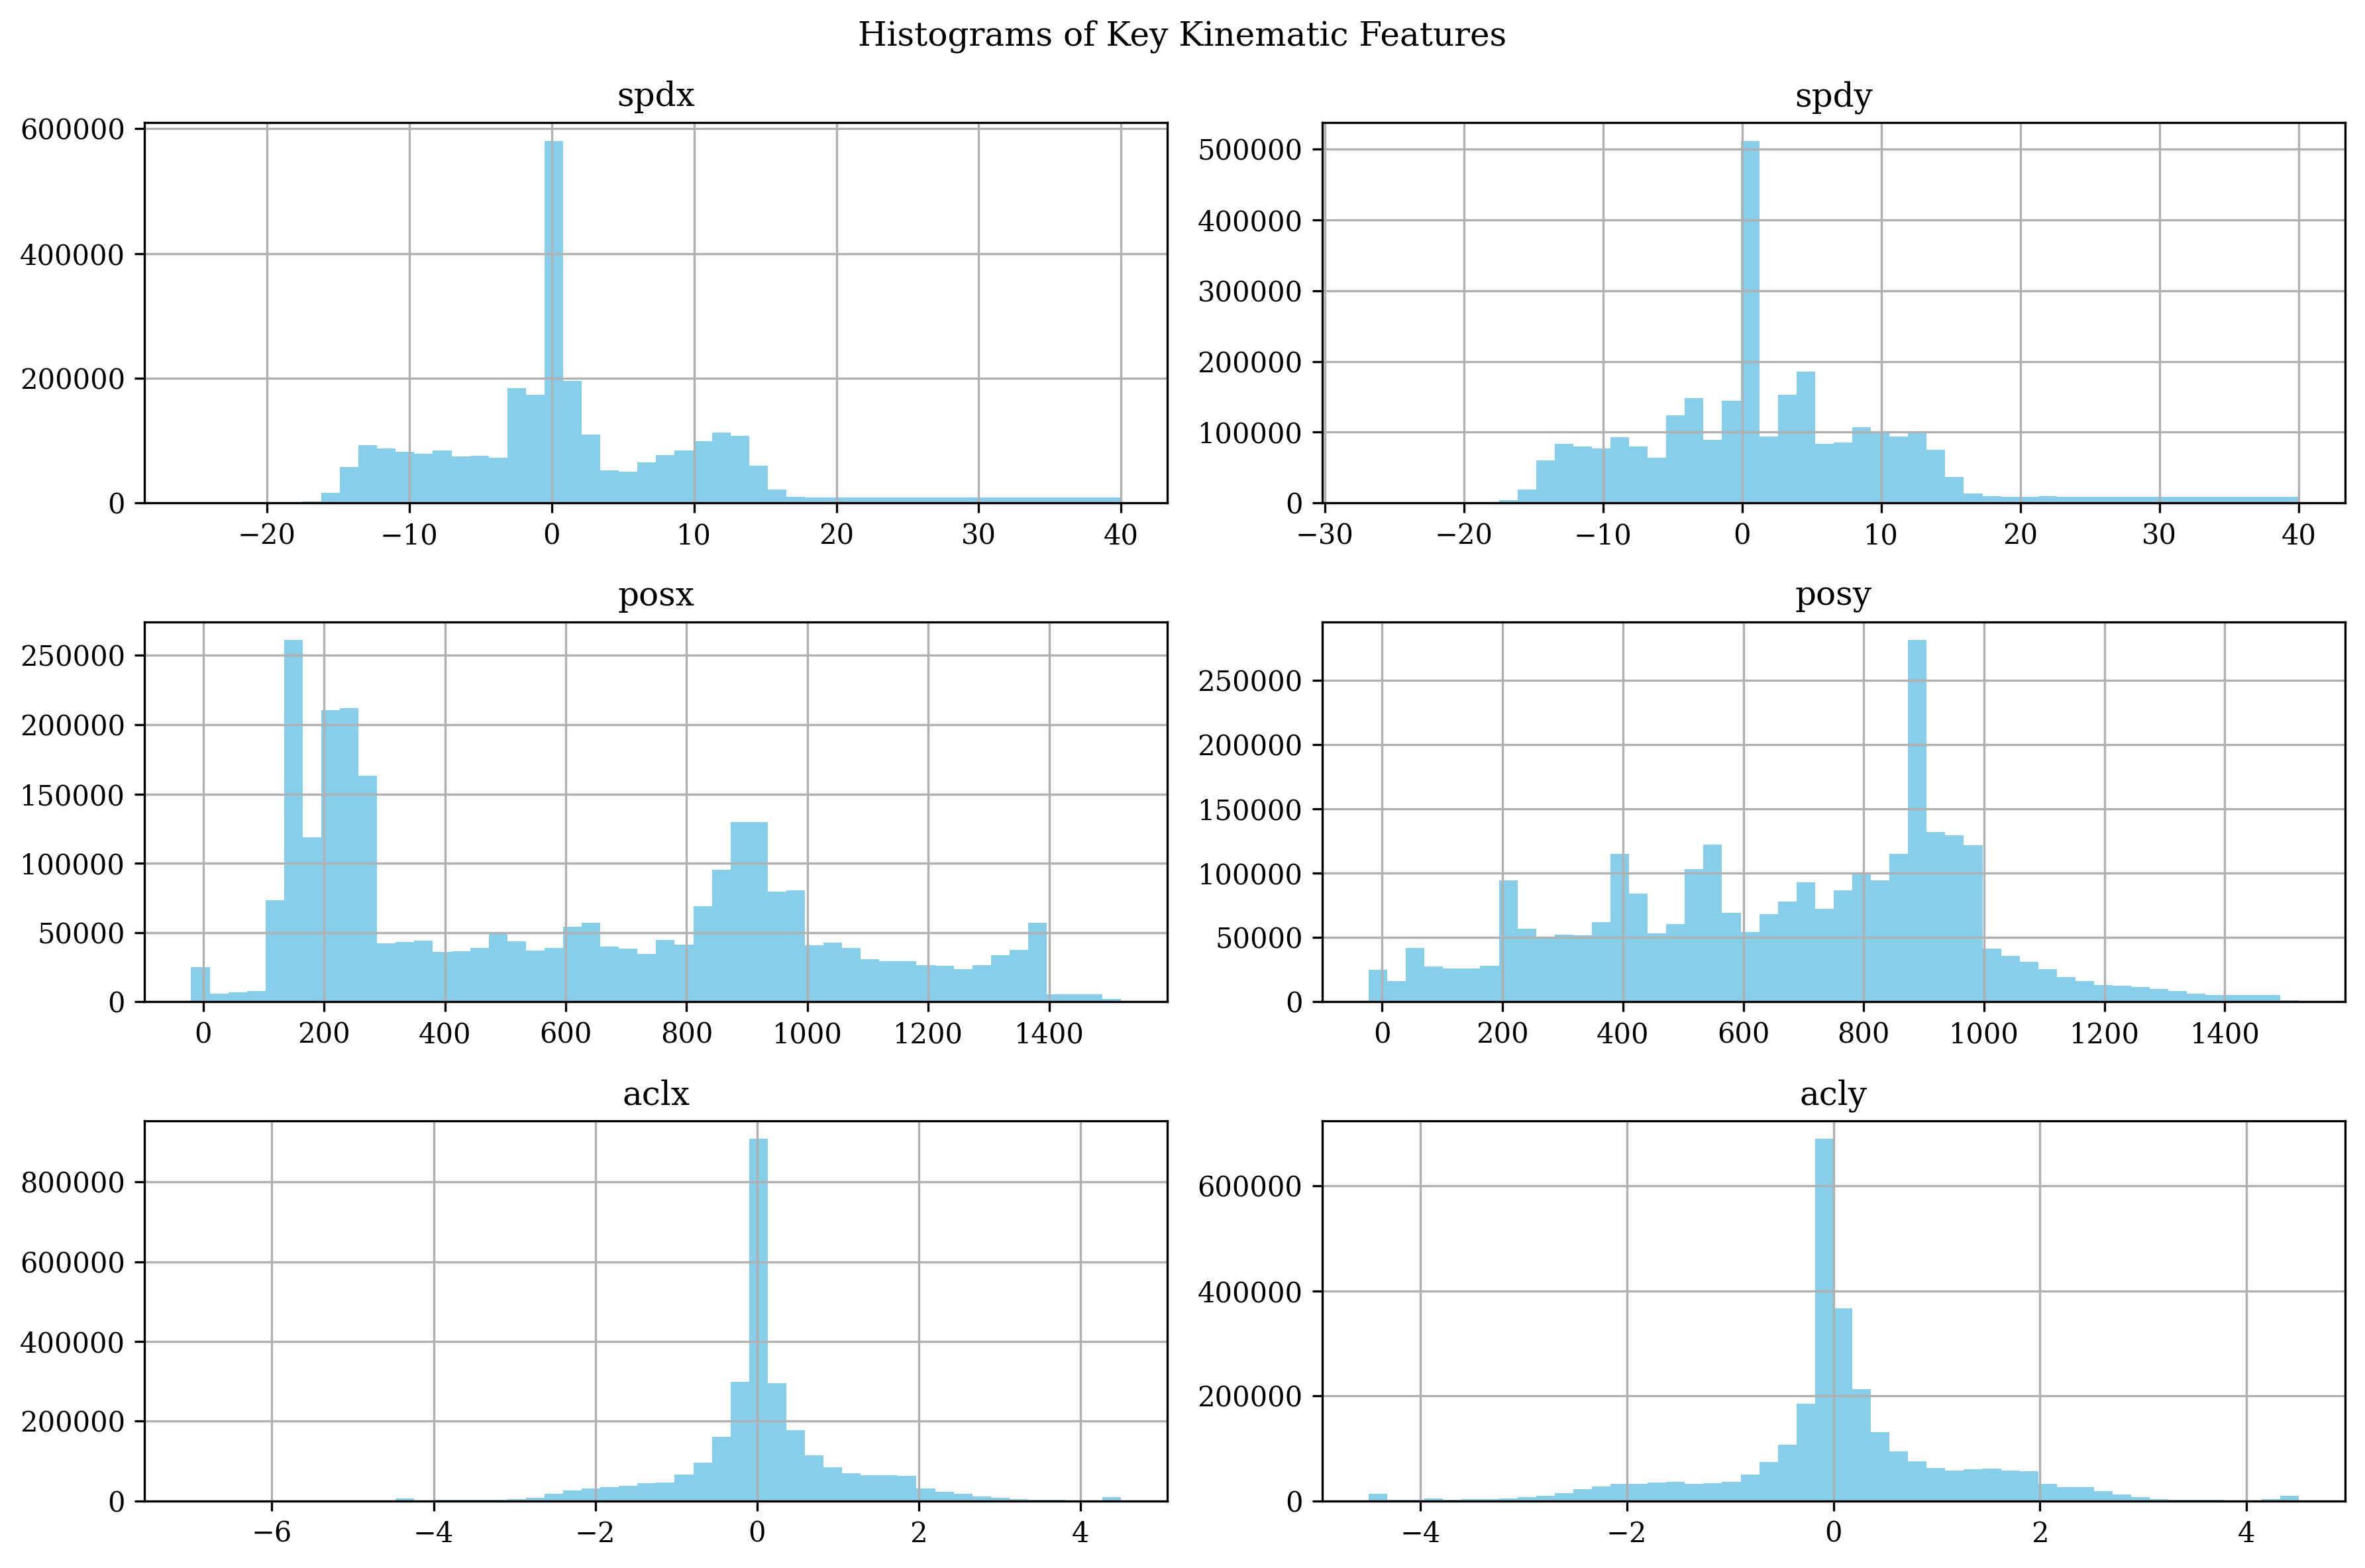

In [25]:
# Histograms (with save)
key_features = ['spdx', 'spdy', 'posx', 'posy', 'aclx', 'acly']
df_binary[key_features].hist(figsize=(12, 8), bins=50, color='skyblue')
plt.suptitle("Histograms of Key Kinematic Features", fontname='serif')
plt.tight_layout()
plt.savefig("feature_histograms.png", dpi=300)
plt.show()

Feature Importance

In [29]:
# Step 1: Install & Import Required Libraries
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Use Serif and 300 DPI for plots
plt.rcParams.update({
    'font.family': 'serif',
    'figure.dpi': 300,
    'savefig.dpi': 300
})

# Step 2: Preprocess Features
# Drop irrelevant & constant columns
X = df_binary.drop(columns=[
    'class', 'binary_label', 'Attack', 'Attack_type',
    'sender', 'senderPseudo', 'messageID'
])
X = X.loc[:, X.nunique() > 1]  # Drop constant features
y = df_binary['binary_label']

# Step 3: ANOVA F-test (Univariate Feature Selection)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': selector.scores_
}).dropna().sort_values(by='F-score', ascending=False)

# Step 4: Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 5: Plot Top 10 by ANOVA F-score
plt.figure(figsize=(10, 4))
sns.barplot(data=anova_scores.head(10), x='F-score', y='Feature', color='steelblue')
plt.title('Top 10 Features by ANOVA F-score')
plt.tight_layout()
plt.savefig("anova_top10_features.png")
plt.show()

# Step 6: Plot Top 10 by Random Forest
plt.figure(figsize=(10, 4))
sns.barplot(data=rf_importance.head(10), x='Importance', y='Feature', color='seagreen')
plt.title('Top 10 Features by Random Forest Importance')
plt.tight_layout()
plt.savefig("rf_top10_features.png")
plt.show()

# Step 7: Print Combined Important Features
top_features = list(set(
    anova_scores.head(10)['Feature'].tolist() +
    rf_importance.head(10)['Feature'].tolist()
))
print("Combined Most Significant Features:")
print(top_features)


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlo

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ddd
# Use Serif and 300 DPI for plots
plt.rcParams.update({
    'font.family': 'serif',
    'figure.dpi': 300,
    'savefig.dpi': 300
})

# Use previously extracted top_features
# If not available, define it again here:
top_features = list(set(
    anova_scores.head(10)['Feature'].tolist() +
    rf_importance.head(10)['Feature'].tolist()
))

#  Violin Plots for Feature Distributions
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df_binary, x='binary_label', y=feature, palette='Set2', scale='width')
    plt.title(f'Distribution of {feature} by Class (0=Normal, 1=Attack)')
    plt.xlabel('Binary Class')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.savefig(f"violin_{feature}.png")
    plt.show()

# Box Plots for Top 3 Features (Optional)
for feature in top_features[:3]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_binary, x='binary_label', y=feature, palette='Set1')
    plt.title(f'Box Plot of {feature} by Class')
    plt.xlabel('Binary Class')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.savefig(f"box_{feature}.png")
    plt.show()


Create Base Dataset 200,000

In [35]:
# Step 1: Split normal and attack records
df_normal = df_binary[df_binary['binary_label'] == 0]
df_attack = df_binary[df_binary['binary_label'] == 1]

# Step 2: Downsample normal class to match attack count
n_attack = len(df_attack)
df_normal_balanced = df_normal.sample(n=n_attack, random_state=42)

# Step 3: Stratified sampling of attack classes (no deprecated behavior)
attack_counts = df_attack['class'].value_counts(normalize=True)

df_attack_balanced = pd.concat([
    df_attack[df_attack['class'] == cls].sample(
        n=int(n_attack * frac), random_state=42
    )
    for cls, frac in attack_counts.items()
])

# Step 4: Combine and shuffle
from sklearn.utils import shuffle
df_balanced_binary = shuffle(
    pd.concat([df_normal_balanced, df_attack_balanced]),
    random_state=42
).reset_index(drop=True)

# Step 5: Confirm balance
print(" Binary class distribution:")
print(df_balanced_binary['binary_label'].value_counts())

print("\n Attack class distribution:")
print(df_balanced_binary[df_balanced_binary['binary_label'] == 1]['class'].value_counts(normalize=True))


✅ Binary class distribution:
binary_label
0    949492
1    949492
Name: count, dtype: int64

📊 Attack class distribution:
class
16    0.184721
13    0.138290
15    0.136146
14    0.133465
18    0.091505
19    0.086467
11    0.046695
17    0.046667
10    0.045565
12    0.045412
9     0.045066
Name: proportion, dtype: float64


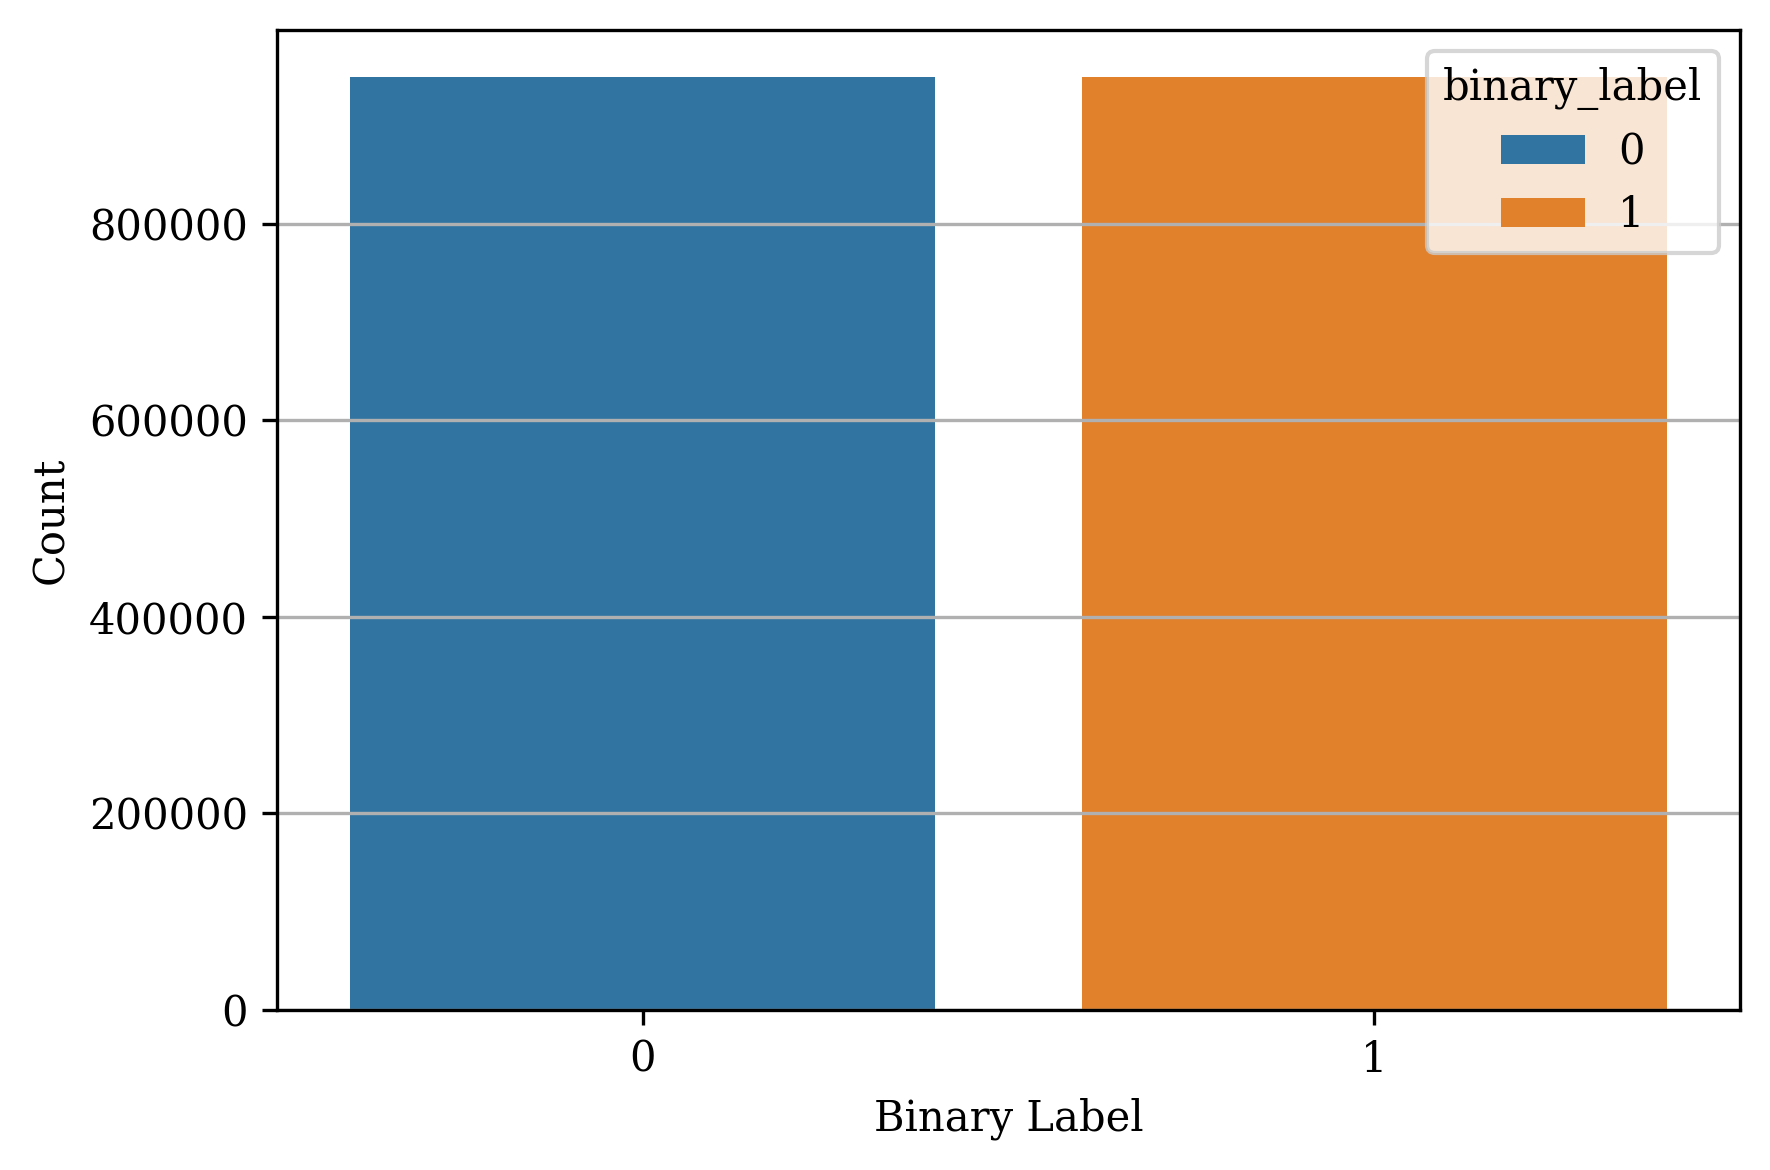

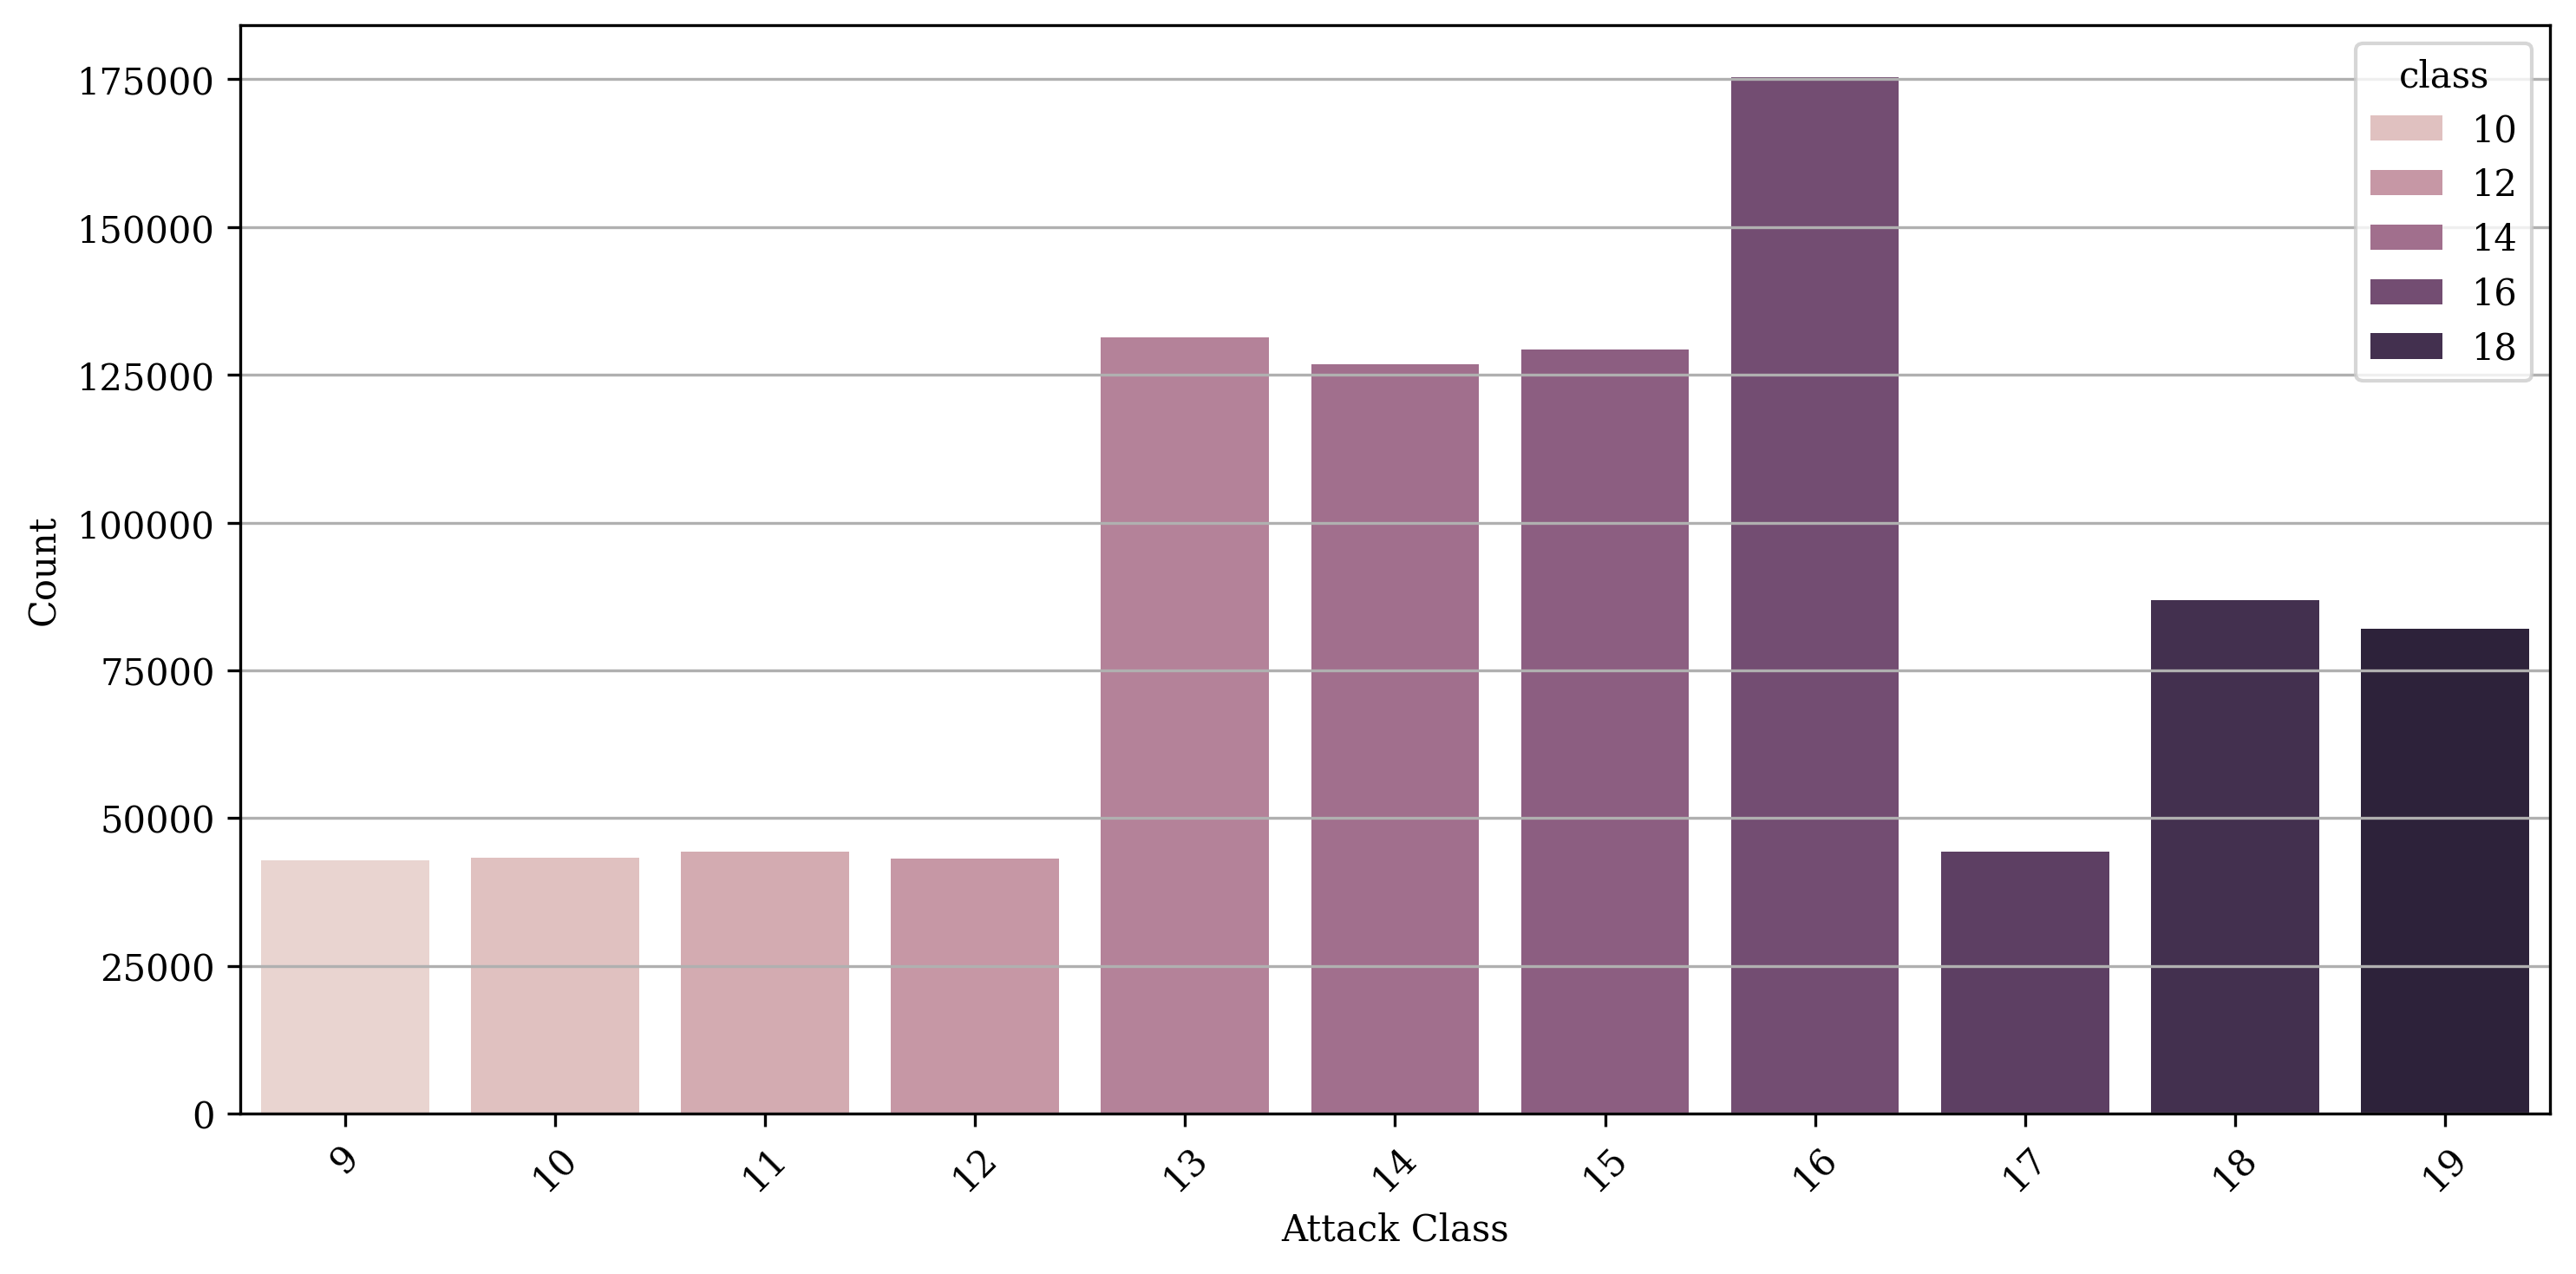

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary class distribution (Normal vs Attack)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_balanced_binary, x='binary_label', hue='binary_label')
#plt.title('Balanced Binary Label Distribution (0 = Normal, 1 = Attack)', fontsize=12)
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("balanced_binary_distribution.png", dpi=300)
plt.show()

# Attack class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_balanced_binary[df_balanced_binary['binary_label'] == 1],
              x='class', hue='class')
#plt.title('Attack Class Distribution (within Attacks)', fontsize=12)
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("attack_class_distribution.png", dpi=300)
plt.show()


Create Subsets

Saved veremi_stratified_20000.csv with 20000 records
20000
binary_label
0    10000
1    10000
Name: count, dtype: int64
class
0     10000
16     1848
13     1385
15     1361
14     1334
18      916
19      864
11      467
17      466
10      455
12      454
9       450
Name: count, dtype: int64


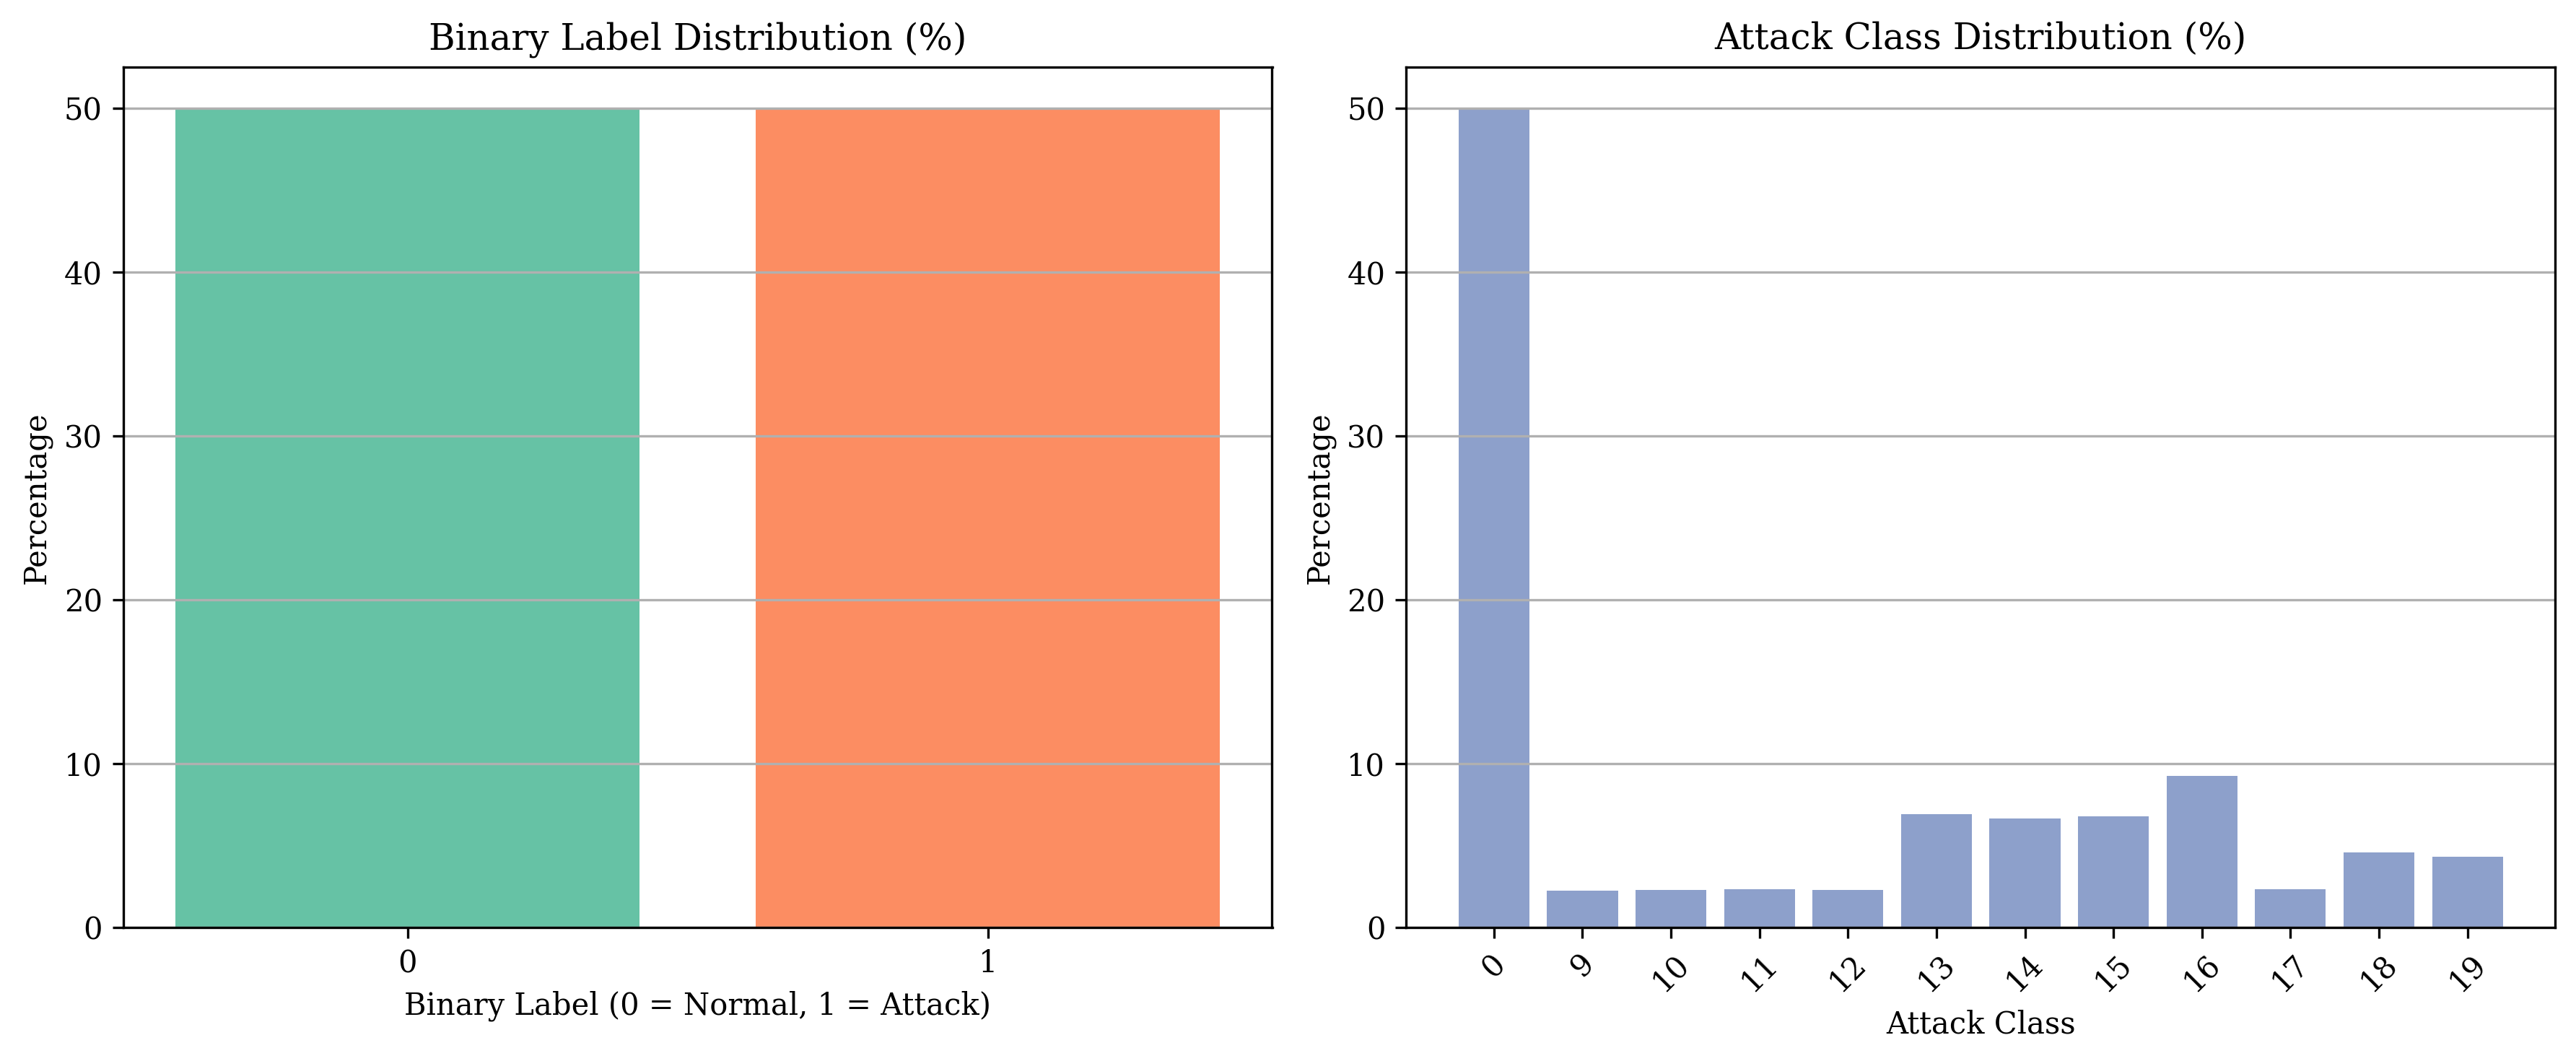

Saved veremi_stratified_40000.csv with 40000 records
40000
binary_label
0    20000
1    20000
Name: count, dtype: int64
class
0     20000
16     3694
13     2767
15     2723
14     2669
18     1831
19     1730
11      933
17      933
10      911
12      908
9       901
Name: count, dtype: int64


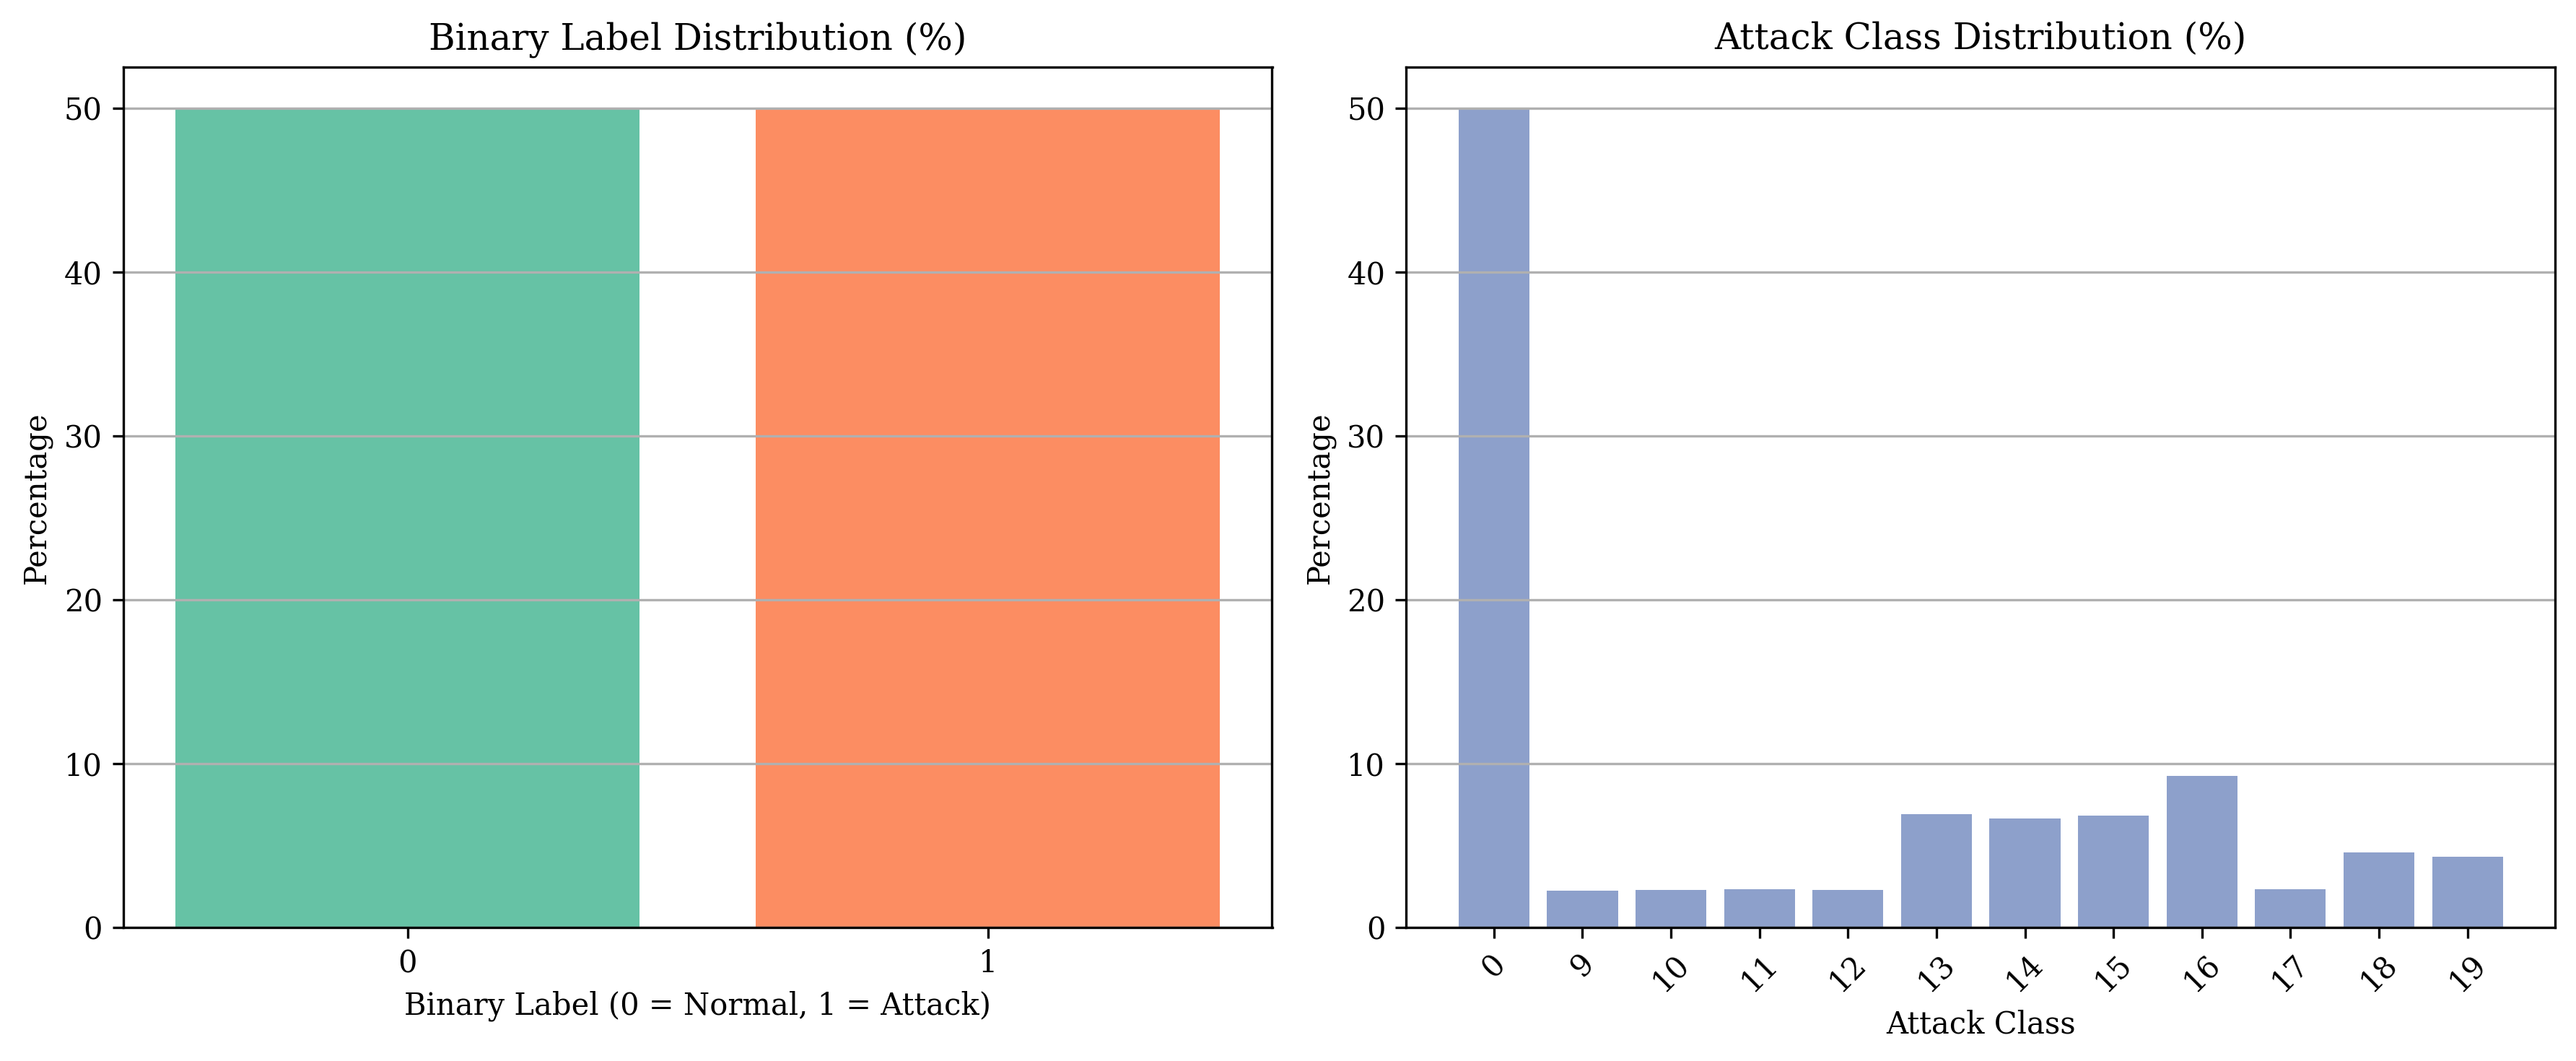

Saved veremi_stratified_80000.csv with 80000 records
80000
binary_label
0    40000
1    40000
Name: count, dtype: int64
class
0     40000
16     7390
13     5531
15     5446
14     5340
18     3661
19     3458
11     1868
17     1866
10     1822
12     1816
9      1802
Name: count, dtype: int64


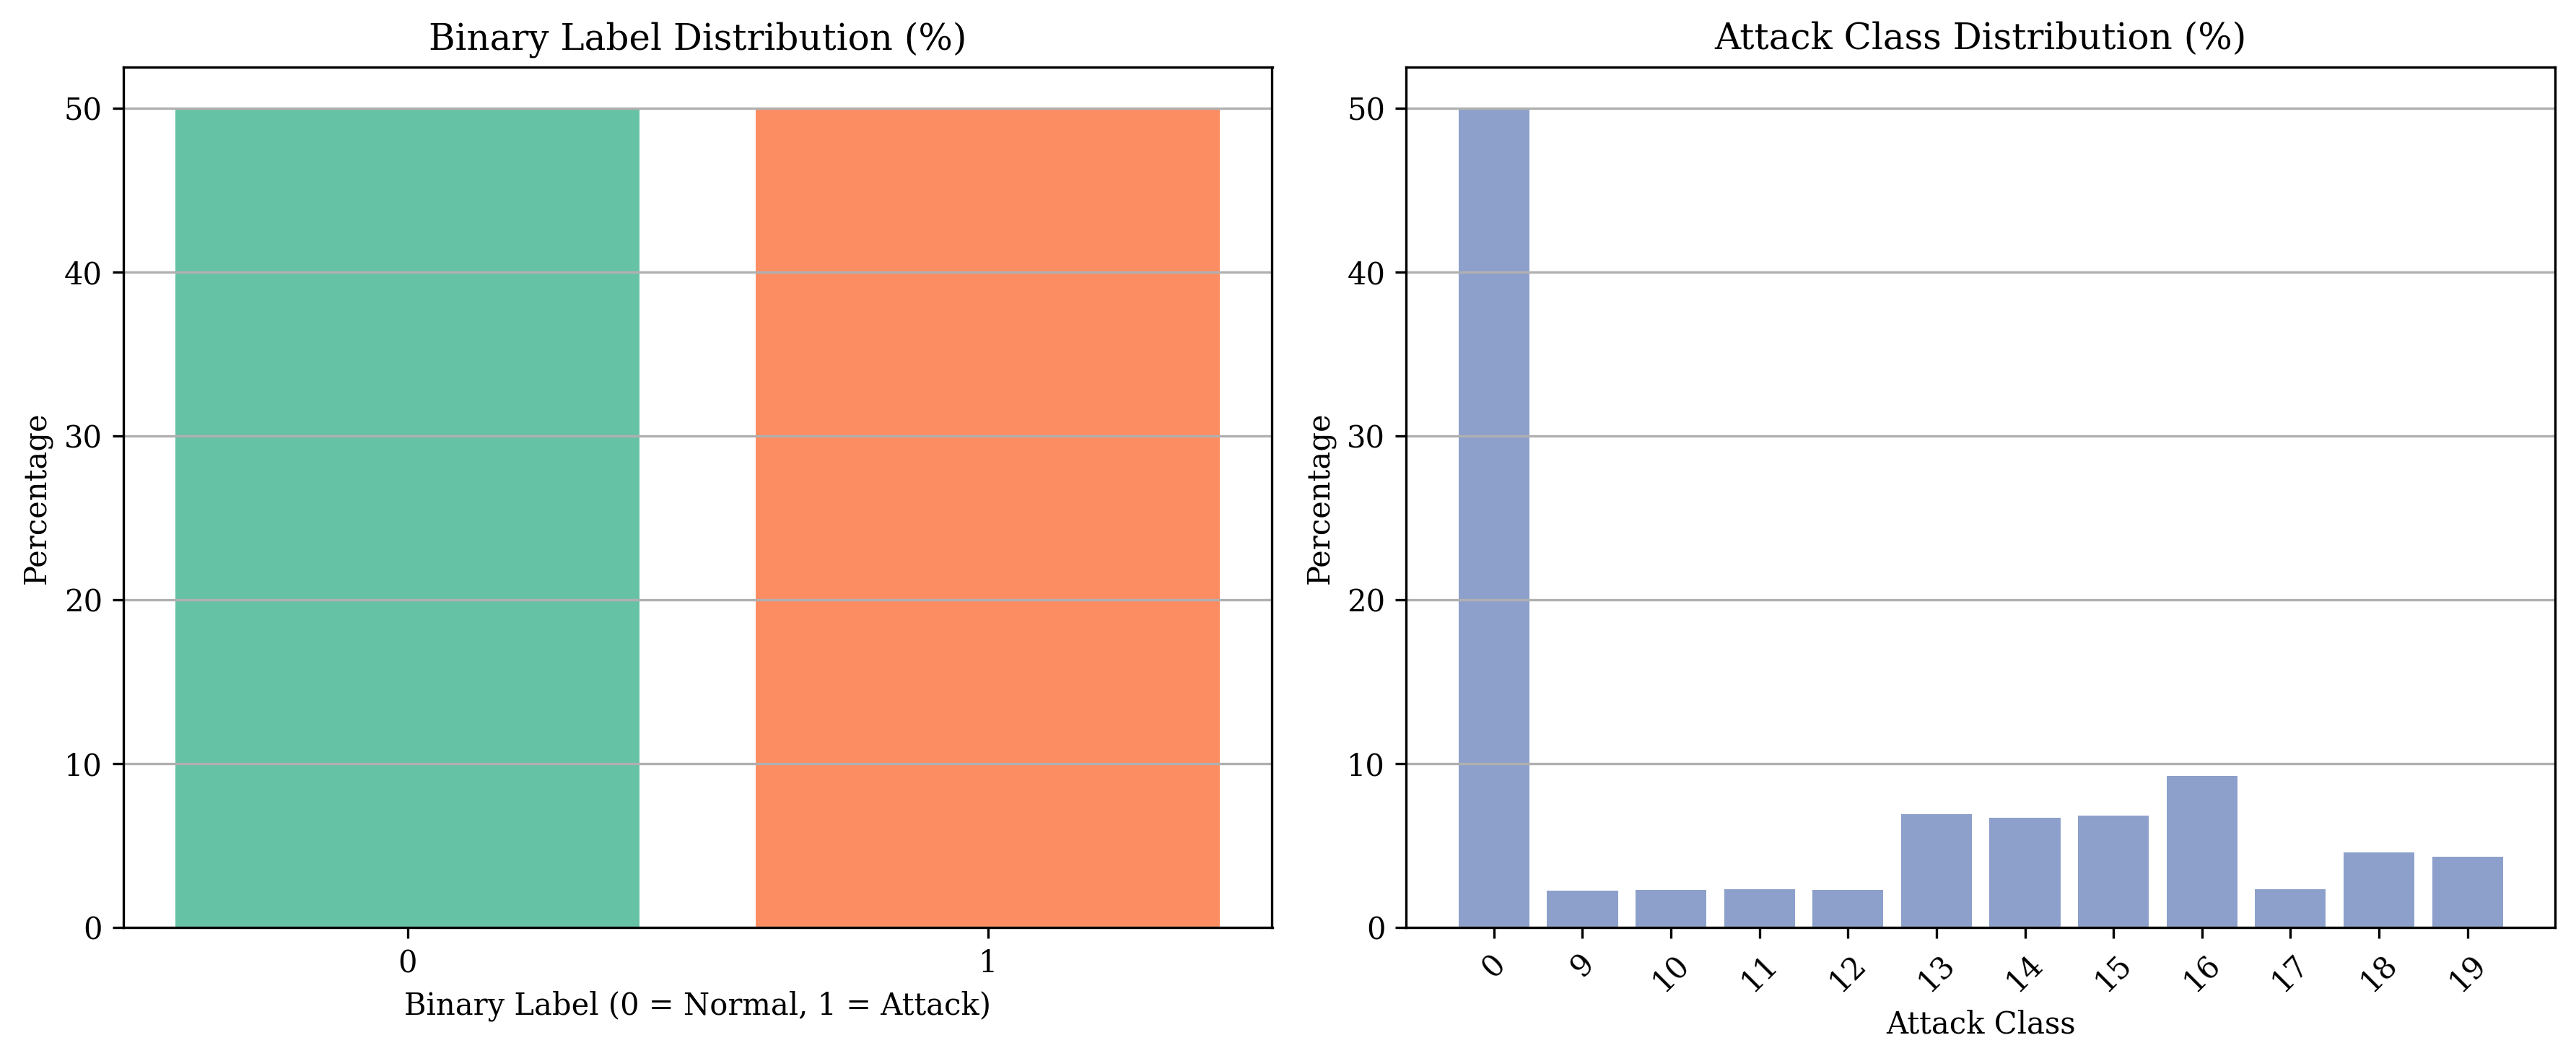

Saved veremi_stratified_120000.csv with 120000 records
120000
binary_label
0    60000
1    60000
Name: count, dtype: int64
class
0     60000
16    11084
13     8297
15     8168
14     8009
18     5491
19     5189
11     2801
17     2800
10     2734
12     2724
9      2703
Name: count, dtype: int64


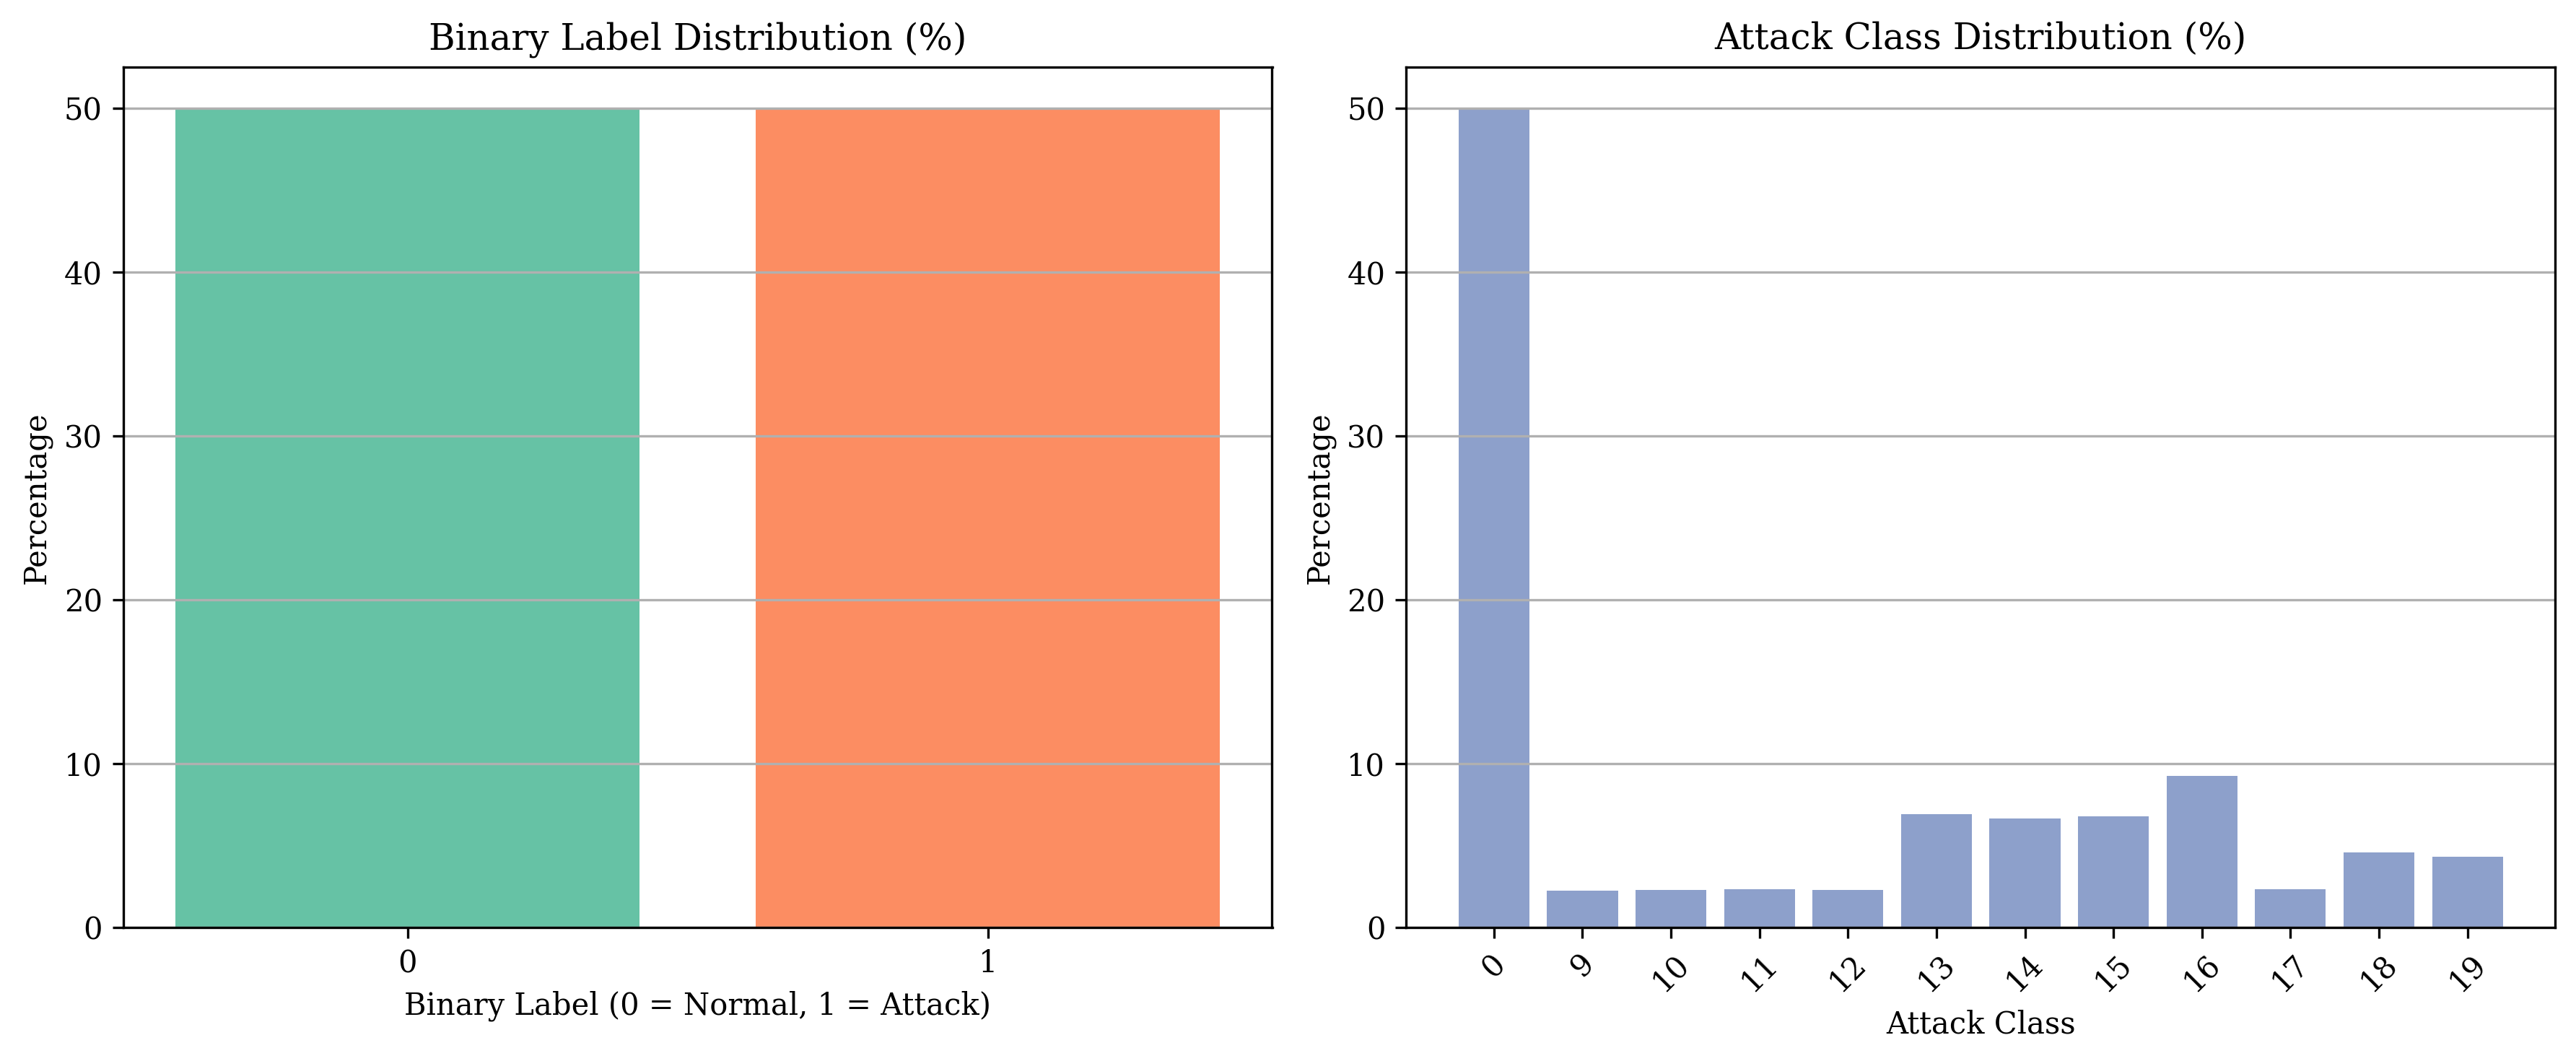

Saved veremi_stratified_160000.csv with 160000 records
160000
binary_label
0    80000
1    80000
Name: count, dtype: int64
class
0     80000
16    14779
13    11063
15    10892
14    10677
18     7320
19     6918
11     3736
17     3733
10     3645
12     3632
9      3605
Name: count, dtype: int64


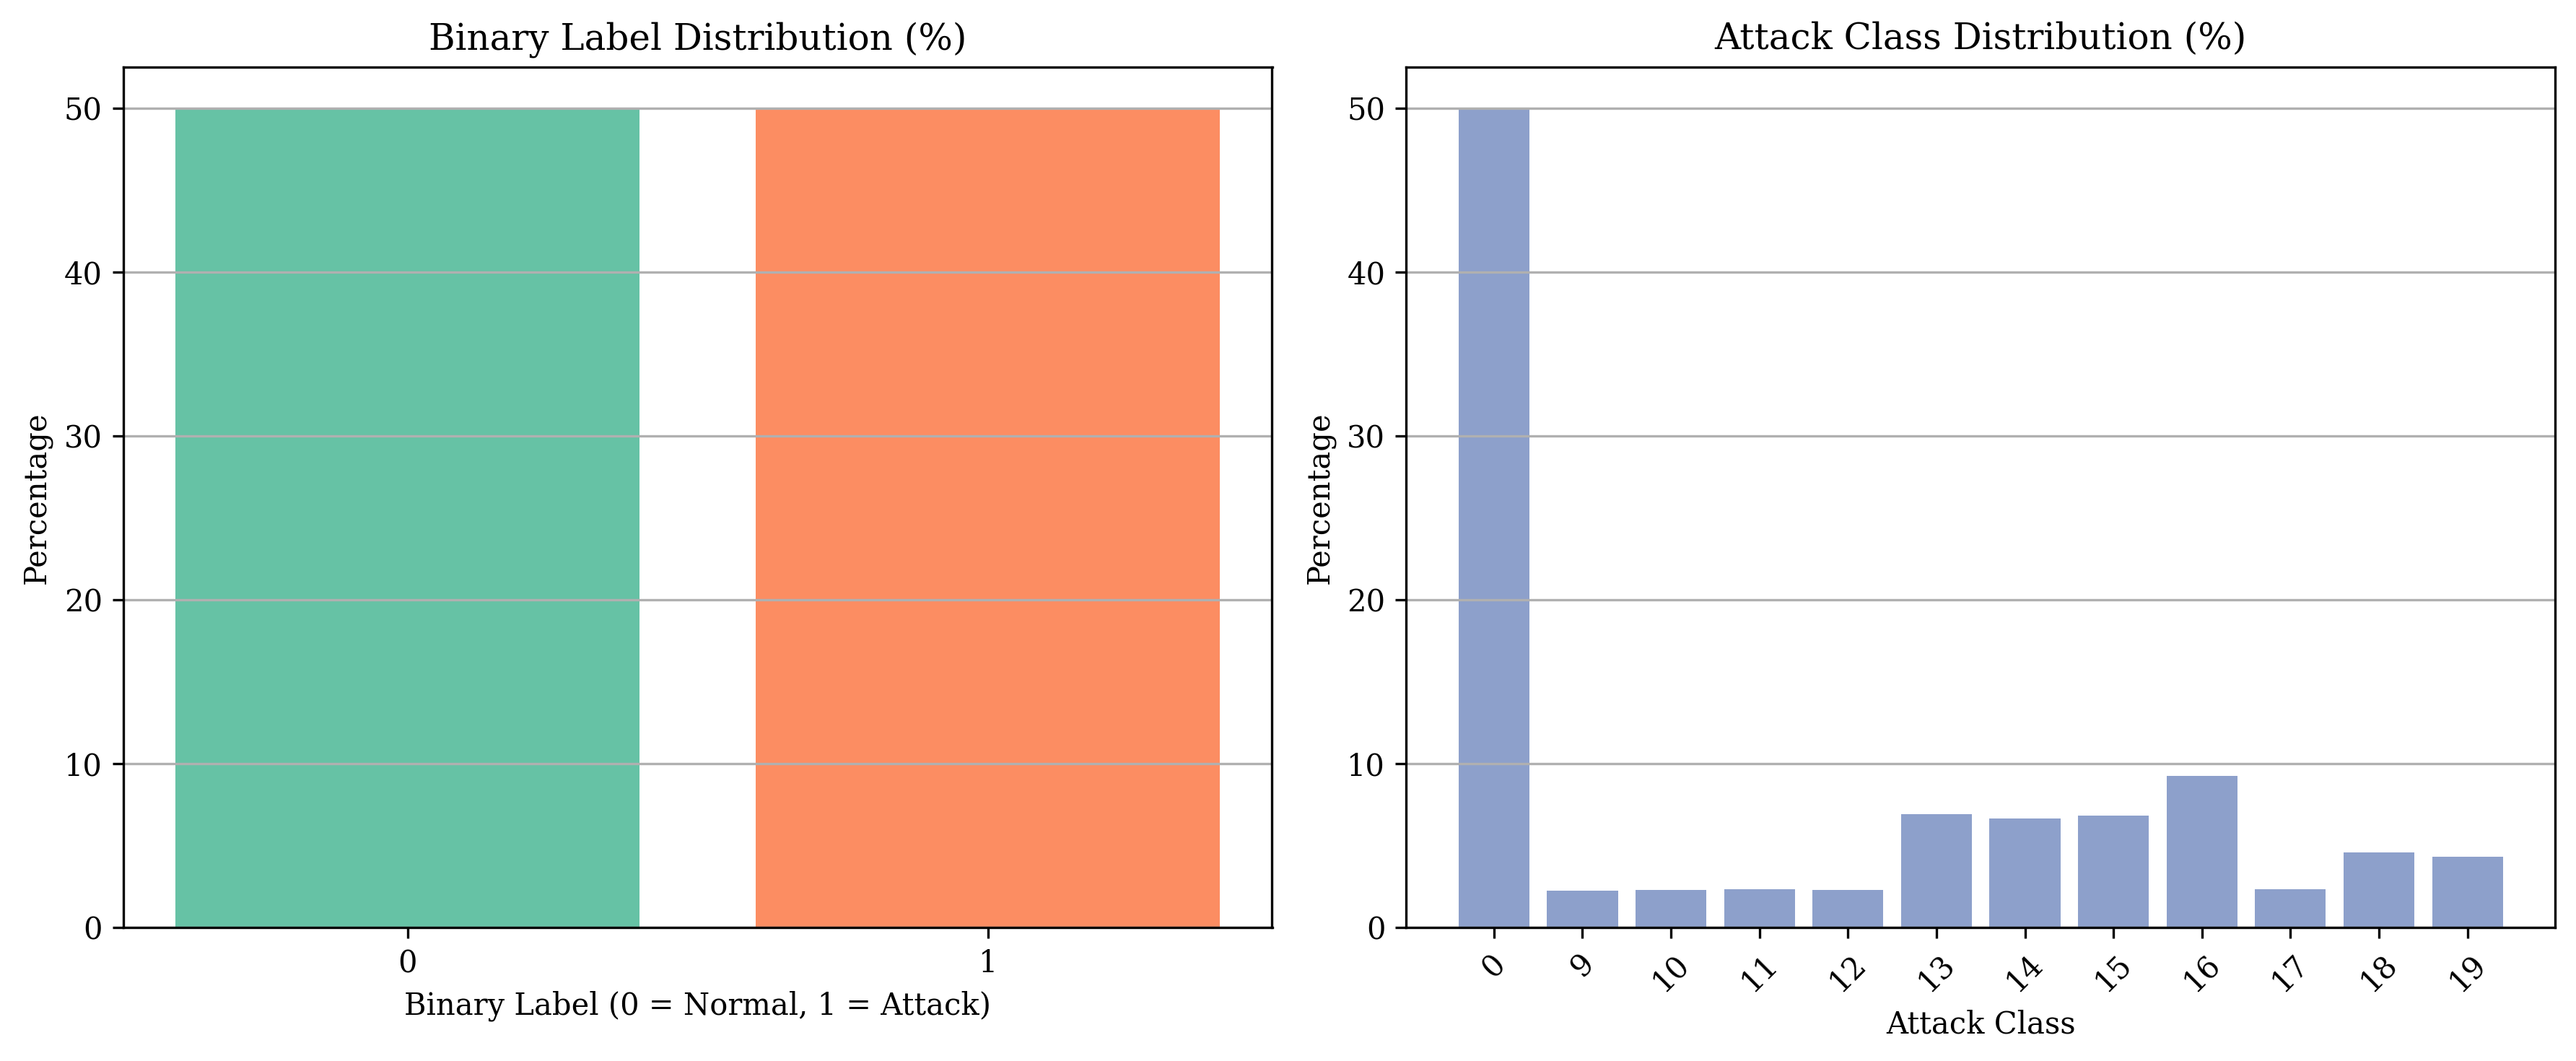

Saved veremi_stratified_200000.csv with 200000 records
200000
binary_label
0    100000
1    100000
Name: count, dtype: int64
class
0     100000
16     18472
13     13830
15     13615
14     13347
18      9151
19      8646
11      4670
17      4666
10      4556
12      4541
9       4506
Name: count, dtype: int64


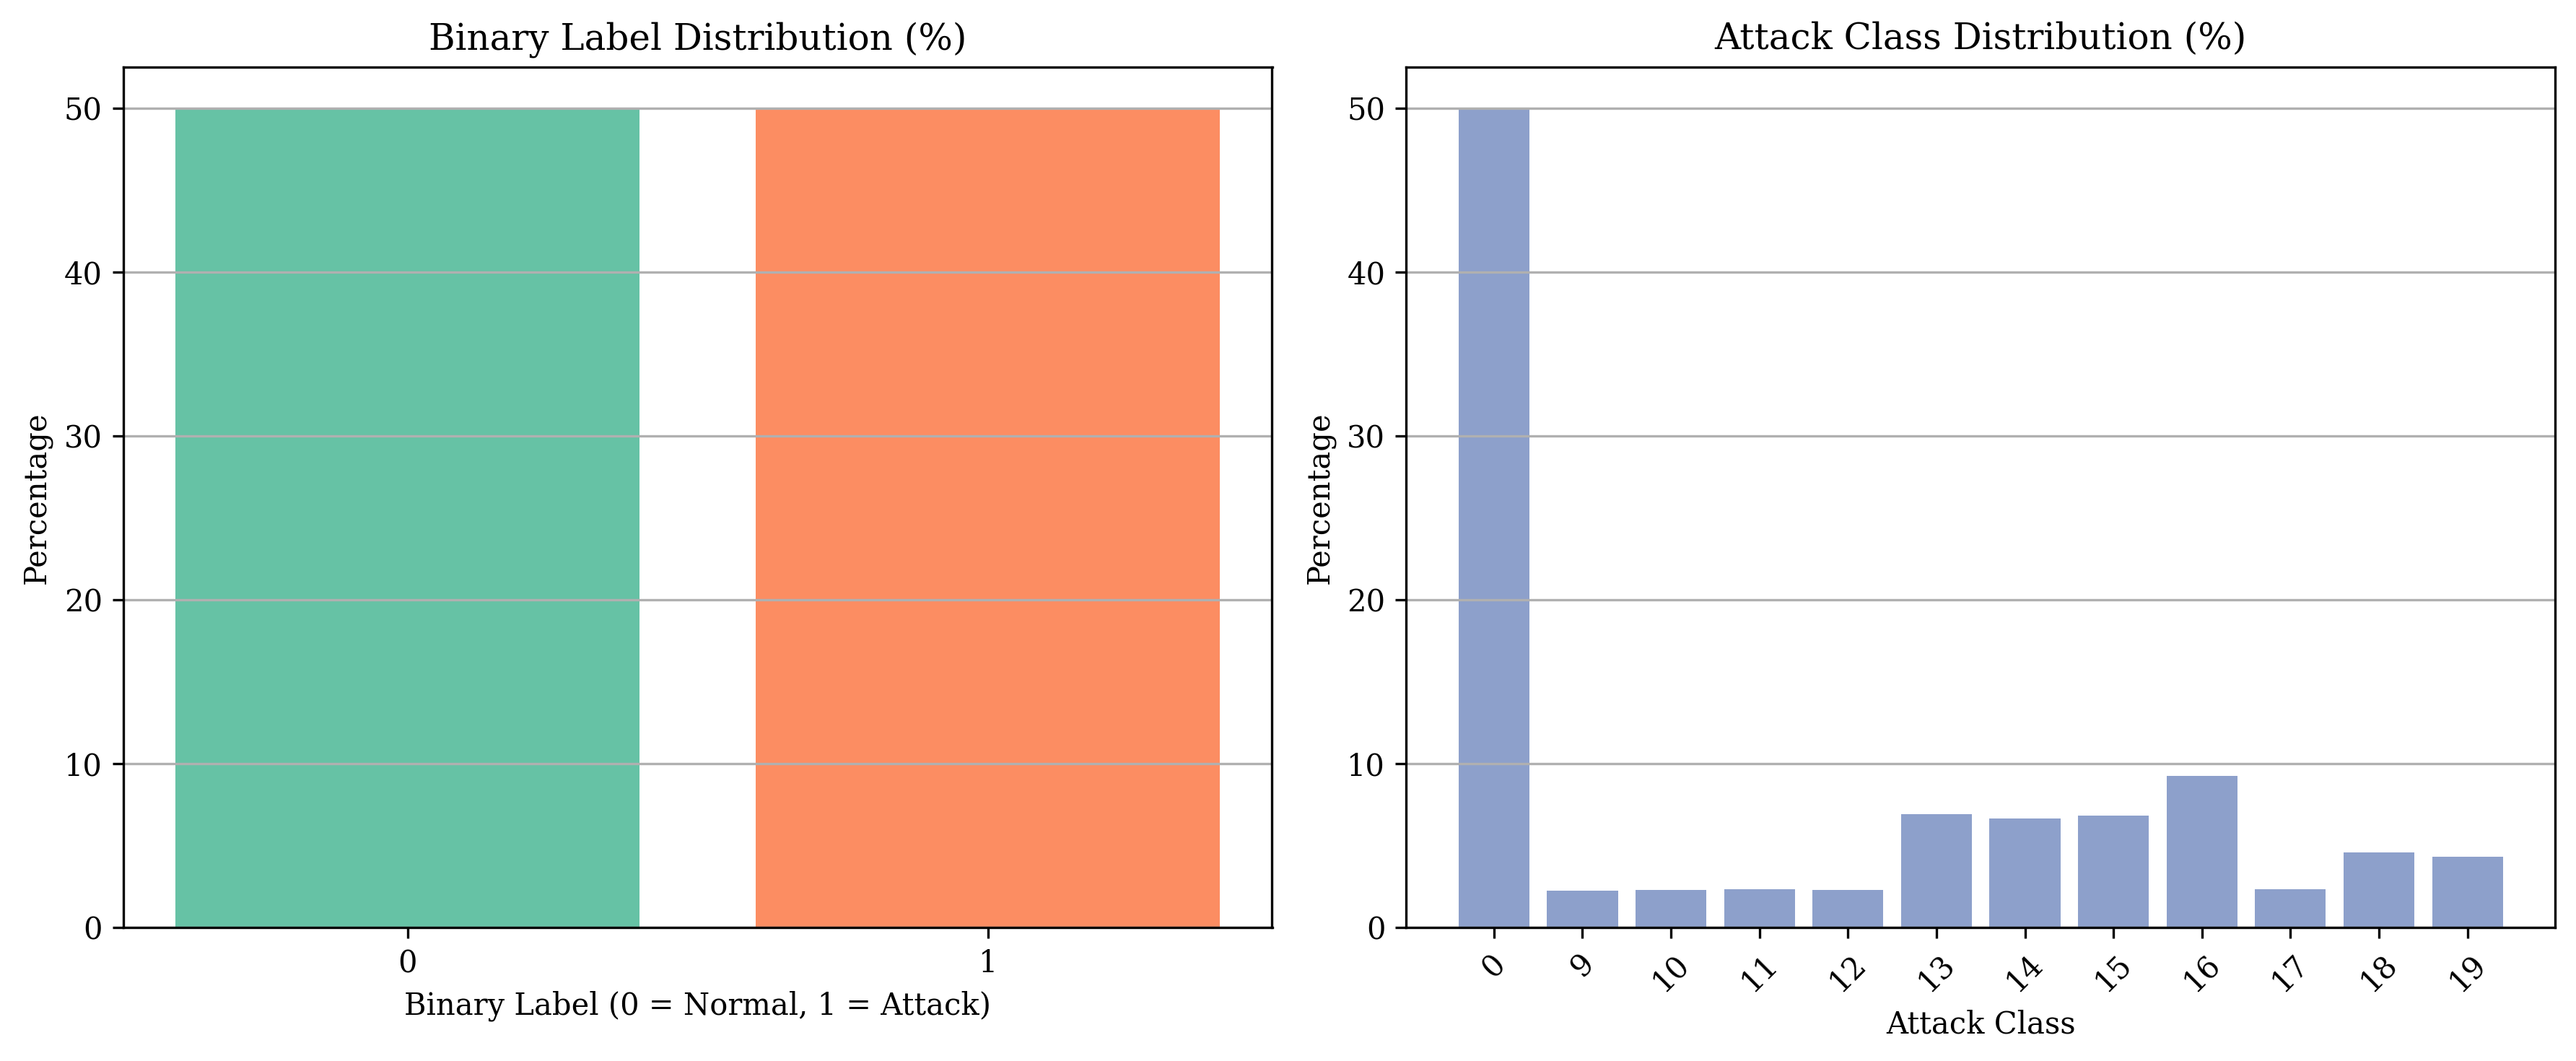

In [44]:
from sklearn.utils import shuffle


subset_sizes = [20000, 40000, 80000, 120000, 160000, 200000]

df_normal = df_balanced_binary[df_balanced_binary['binary_label'] == 0]
df_attack = df_balanced_binary[df_balanced_binary['binary_label'] == 1]

attack_class_proportions = df_attack['class'].value_counts(normalize=True)

for size in subset_sizes:
    n_attack = size // 2
    n_normal = size // 2

    # Sample attack data proportionally without exceeding available count
    attack_samples = []
    for cls, frac in attack_class_proportions.items():
        cls_pool = df_attack[df_attack['class'] == cls]
        n_cls = min(len(cls_pool), int(n_attack * frac))
        attack_samples.append(cls_pool.sample(n=n_cls, random_state=42))
    attack_subset = pd.concat(attack_samples)

    # If slightly under n_attack due to rounding, sample extra from full attack pool
    if len(attack_subset) < n_attack:
        remaining = n_attack - len(attack_subset)
        extra = df_attack.drop(attack_subset.index).sample(n=remaining, random_state=42)
        attack_subset = pd.concat([attack_subset, extra])

    # Sample normal records
    normal_subset = df_normal.sample(n=n_normal, random_state=42)

    # Combine and shuffle
    df_subset = shuffle(pd.concat([attack_subset, normal_subset]), random_state=42).reset_index(drop=True)

    # Save to file
    df_subset.to_csv(f'veremi_stratified_{size}.csv', index=False)
    print(f"Saved veremi_stratified_{size}.csv with {len(df_subset)} records")
    print(len(df_subset))
    print(df_subset["binary_label"].value_counts())
    print(df_subset["class"].value_counts())

    # Compute percentages
    binary_counts = df_subset['binary_label'].value_counts(normalize=True) * 100
    class_counts = df_subset['class'].value_counts(normalize=True) * 100

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].bar(binary_counts.index.astype(str), binary_counts.values, color=['#66c2a5', '#fc8d62'])
    axes[0].set_title('Binary Label Distribution (%)')
    axes[0].set_xlabel('Binary Label (0 = Normal, 1 = Attack)')
    axes[0].set_ylabel('Percentage')
    axes[0].grid(axis='y')

    class_counts_sorted = class_counts.sort_index()
    axes[1].bar(class_counts_sorted.index.astype(str), class_counts_sorted.values, color='#8da0cb')
    axes[1].set_title('Attack Class Distribution (%)')
    axes[1].set_xlabel('Attack Class')
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y')

    plt.tight_layout()
    plt.show()


In [46]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd

# Define subset sizes
subset_sizes = [20000, 40000, 80000, 120000, 160000, 200000]

# Split normal and attack records
df_normal = df_balanced_binary[df_balanced_binary['binary_label'] == 0]
df_attack = df_balanced_binary[df_balanced_binary['binary_label'] == 1]
attack_class_proportions = df_attack['class'].value_counts(normalize=True)

# Initialize tracking DataFrame
subset_class_summary = pd.DataFrame()

for size in subset_sizes:
    n_attack = size // 2
    n_normal = size // 2

    # Stratified attack sampling
    attack_samples = []
    for cls, frac in attack_class_proportions.items():
        cls_pool = df_attack[df_attack['class'] == cls]
        n_cls = min(len(cls_pool), int(n_attack * frac))
        attack_samples.append(cls_pool.sample(n=n_cls, random_state=42))
    attack_subset = pd.concat(attack_samples)

    # Pad with extra if needed
    if len(attack_subset) < n_attack:
        remaining = n_attack - len(attack_subset)
        extra = df_attack.drop(attack_subset.index).sample(n=remaining, random_state=42)
        attack_subset = pd.concat([attack_subset, extra])

    # Normal class sampling
    normal_subset = df_normal.sample(n=n_normal, random_state=42)

    # Combine and shuffle
    df_subset = shuffle(pd.concat([attack_subset, normal_subset]), random_state=42).reset_index(drop=True)

    # Save to file
    df_subset.to_csv(f'veremi_stratified_{size}.csv', index=False)
    print(f"\n Saved veremi_stratified_{size}.csv with {len(df_subset)} records")
    print(df_subset["binary_label"].value_counts())
    print(df_subset["class"].value_counts())

    # ---- Plot distributions ----
    binary_counts = df_subset['binary_label'].value_counts(normalize=True) * 100
    class_counts = df_subset['class'].value_counts(normalize=True).sort_index() * 100
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].bar(binary_counts.index.astype(str), binary_counts.values, color=['#66c2a5', '#fc8d62'])
    axes[0].set_title('Binary Label Distribution (%)')
    axes[0].set_xlabel('Binary Label (0 = Normal, 1 = Attack)')
    axes[0].set_ylabel('Percentage')
    axes[0].grid(axis='y')

    axes[1].bar(class_counts.index.astype(str), class_counts.values, color='#8da0cb')
    axes[1].set_title('Attack Class Distribution (%)')
    axes[1].set_xlabel('Attack Class')
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y')

    plt.tight_layout()
    plt.show()
    '''
    # ---- Track class distribution for summary ----
    class_row = class_counts.copy()
    class_row['subset_size'] = size
    subset_class_summary = pd.concat([subset_class_summary, class_row.to_frame().T], ignore_index=True)

# ---- Final formatting ----
subset_class_summary = subset_class_summary.set_index('subset_size')
subset_class_summary.index.name = 'Sample Size'
subset_class_summary = subset_class_summary[sorted(subset_class_summary.columns, key=lambda x: int(x))]
subset_class_summary = subset_class_summary.fillna(0)
subset_class_summary.head(10)



 Saved veremi_stratified_20000.csv with 20000 records
binary_label
0    10000
1    10000
Name: count, dtype: int64
class
0     10000
16     1848
13     1385
15     1361
14     1334
18      916
19      864
11      467
17      466
10      455
12      454
9       450
Name: count, dtype: int64

 Saved veremi_stratified_40000.csv with 40000 records
binary_label
0    20000
1    20000
Name: count, dtype: int64
class
0     20000
16     3694
13     2767
15     2723
14     2669
18     1831
19     1730
11      933
17      933
10      911
12      908
9       901
Name: count, dtype: int64

 Saved veremi_stratified_80000.csv with 80000 records
binary_label
0    40000
1    40000
Name: count, dtype: int64
class
0     40000
16     7390
13     5531
15     5446
14     5340
18     3661
19     3458
11     1868
17     1866
10     1822
12     1816
9      1802
Name: count, dtype: int64

 Saved veremi_stratified_120000.csv with 120000 records
binary_label
0    60000
1    60000
Name: count, dtype: int64
class


class,0,9,10,11,12,13,14,15,16,17,18,19
Sample Size,,,,,,,,,,,,
20000.0,50.0,2.250000,2.275000,2.335000,2.2700,6.925000,6.670000,6.805000,9.240000,2.330000,4.580000,4.320000
40000.0,50.0,2.252500,2.277500,2.332500,2.2700,6.917500,6.672500,6.807500,9.235000,2.332500,4.577500,4.325000
80000.0,50.0,2.252500,2.277500,2.335000,2.2700,6.913750,6.675000,6.807500,9.237500,2.332500,4.576250,4.322500
120000.0,50.0,2.252500,2.278333,2.334167,2.2700,6.914167,6.674167,6.806667,9.236667,2.333333,4.575833,4.324167
160000.0,50.0,2.253125,2.278125,2.335000,2.2700,6.914375,6.673125,6.807500,9.236875,2.333125,4.575000,4.323750
200000.0,50.0,2.253000,2.278000,2.335000,2.2705,6.915000,6.673500,6.807500,9.236000,2.333000,4.575500,4.323000


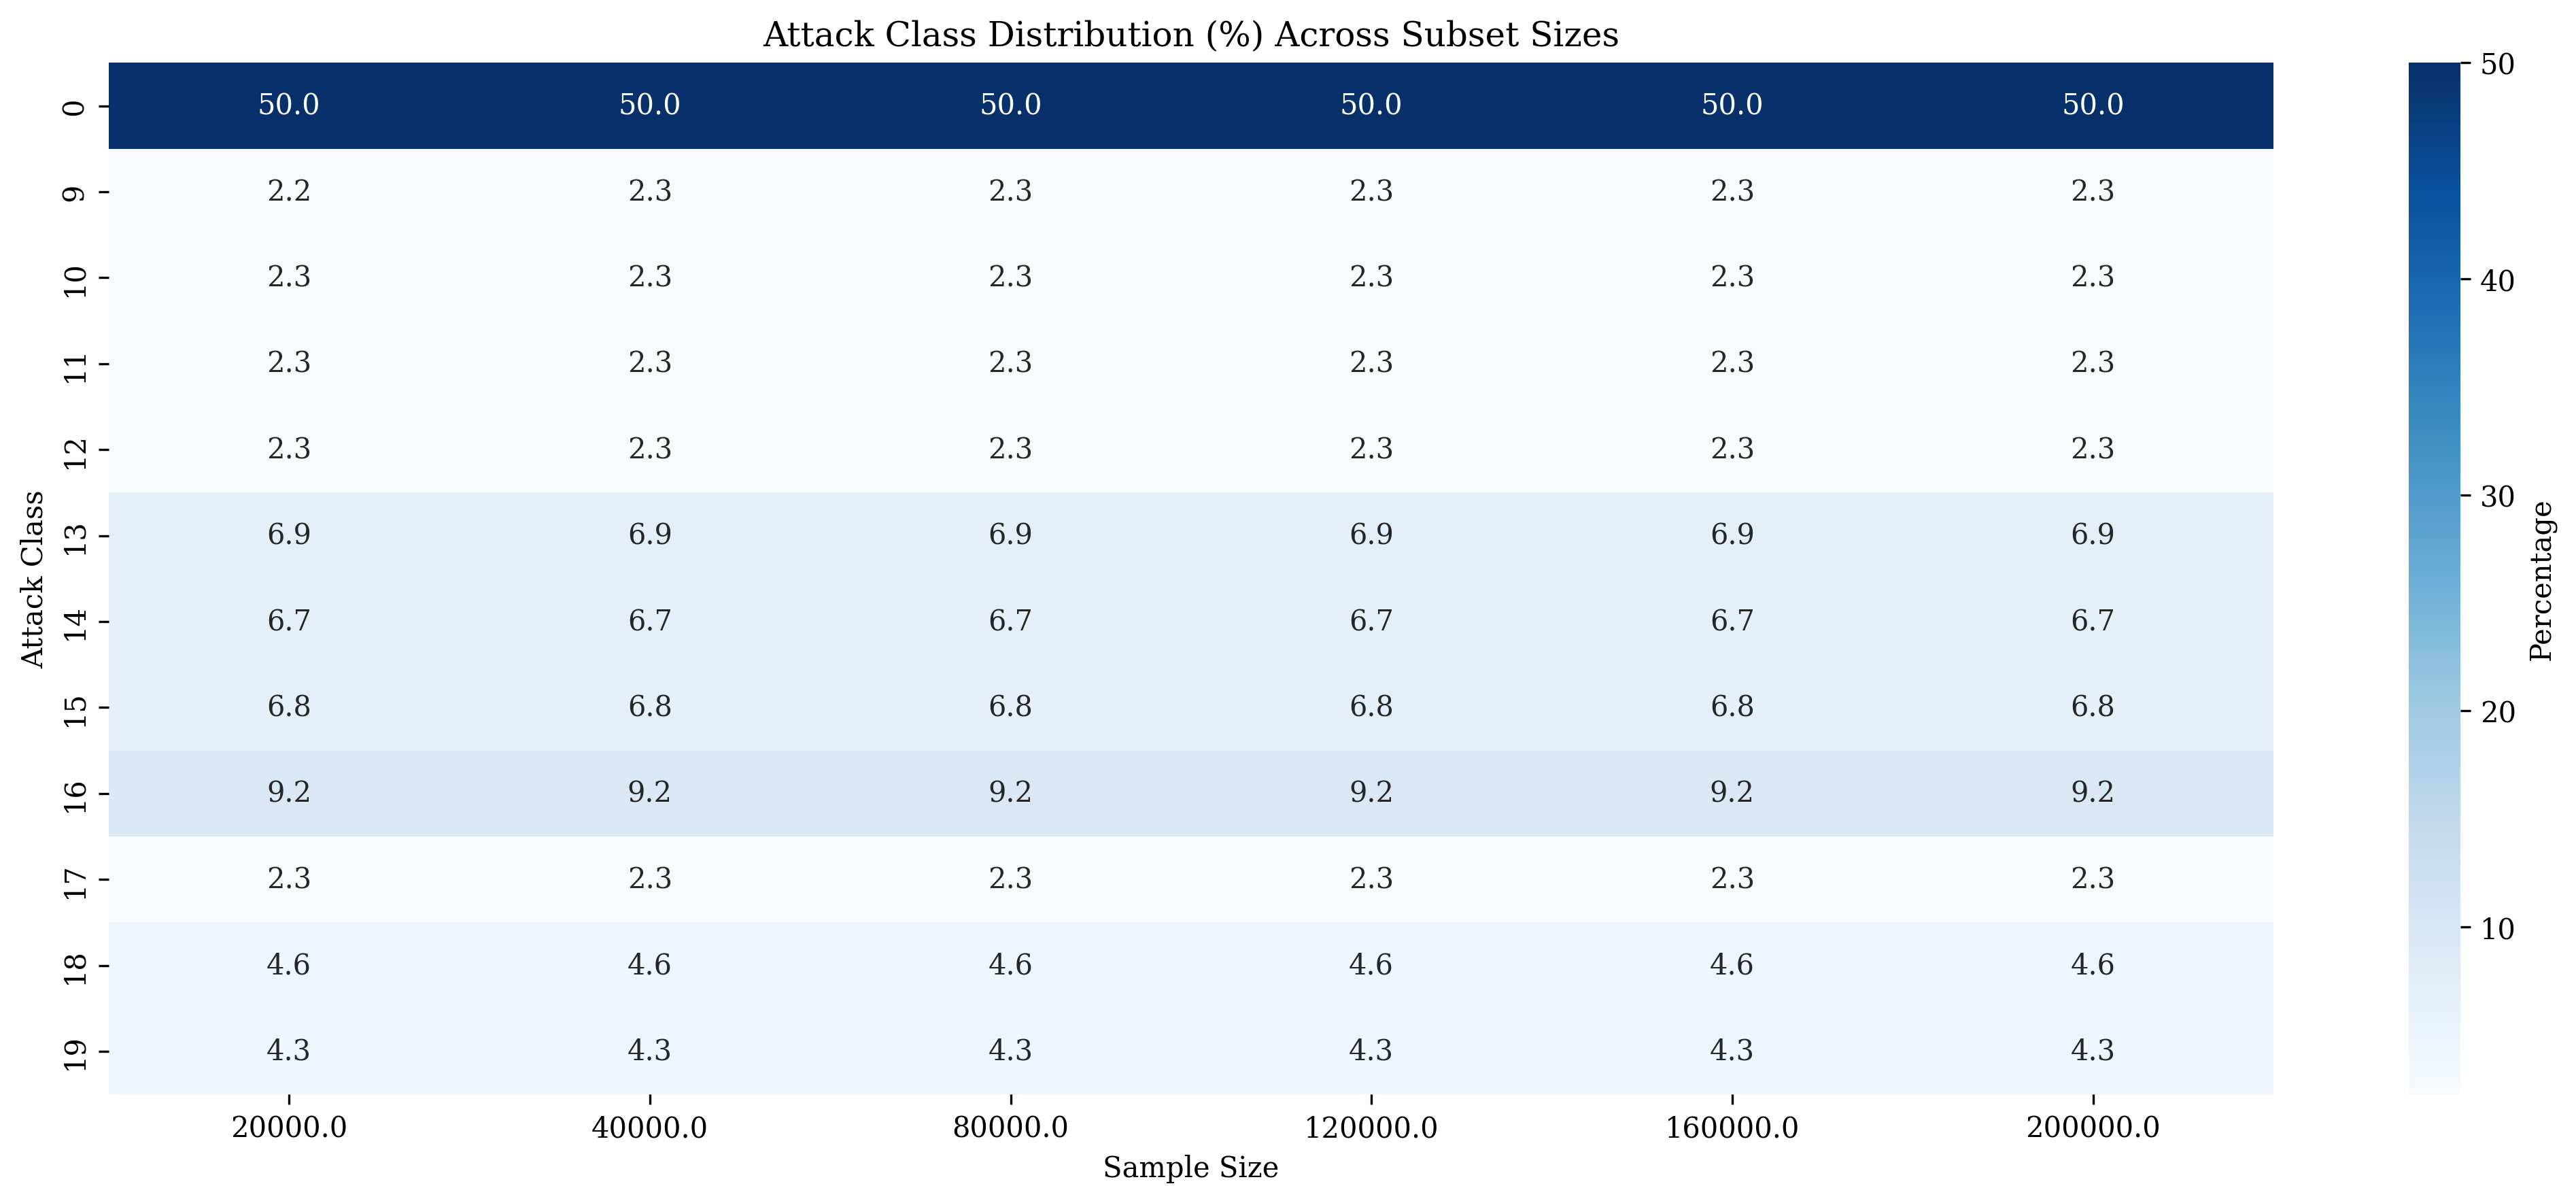

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(subset_class_summary.T, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Percentage'})

plt.title("Attack Class Distribution (%) Across Subset Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Attack Class")
plt.tight_layout()
plt.show()


In [52]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Melt DataFrame to long format
df_long = subset_class_summary.reset_index().melt(id_vars='Sample Size', var_name='Attack Class', value_name='Percentage')
df_long['Attack Class'] = df_long['Attack Class'].astype(str)

# Generate distinct colors for each class using a colormap
unique_classes = sorted(df_long['Attack Class'].unique(), key=lambda x: int(x))
color_map = cm.get_cmap('tab20', len(unique_classes))
class_colors = {cls: mcolors.to_hex(color_map(i)) for i, cls in enumerate(unique_classes)}

# Create 3D lines for each (Sample Size, Attack Class)
fig = go.Figure()

for _, row in df_long.iterrows():
    x = row['Sample Size']
    y = row['Attack Class']
    z = row['Percentage']
    color = class_colors[y]

    fig.add_trace(go.Scatter3d(
        x=[x, x],
        y=[y, y],
        z=[0, z],
        mode='lines',
        line=dict(color=color, width=10),
        name=f'Class {y}',
        showlegend=False,
        hovertemplate=f"Sample Size: {x}<br>Attack Class: {y}<br>Percentage: {z:.2f}%<extra></extra>"
    ))

# Add legend entries manually (one per class)
for cls, color in class_colors.items():
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='lines',
        line=dict(color=color, width=10),
        name=f'Class {cls}',
        showlegend=True
    ))

# Layout
fig.update_layout(
    title="3D Class-Wise Distribution Across Sample Sizes",
    scene=dict(
        xaxis_title='Sample Size',
        yaxis_title='Attack Class',
        zaxis_title='Percentage',
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


<ipython-input-52-981602176>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [54]:
from datetime import datetime

# Get current date and time
current_datetime = datetime.now()
print(current_datetime)

2025-06-14 18:29:46.997550
